# Análisis Explotario de Datos
- Dataset: Predict Students' Dropout and Academic Success
- Fuente: UCI Repository
- Autor:  --
- Fecha: Enero 2026

In [1]:
import sys
import os
# Obtener ruta absoluta al proyecto (un nivel arriba de notebooks/)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Agregar al path
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

import os
from src.data.clean_columns import clean_dataframe_columns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils.constants import (
    VARS_BINARIAS,
    VARS_CATEGORICAS_NOMINALES,
    VARS_CATEGORICAS_ORDINALES,
    VARS_NUMERICAS,
    TARGET,
    TARGET_VALUES,
    LABELS    
)



## 1. Carga y Dimensión del dataset
Este paso permite conocer cuántas observaciones y variables contiene el dataset.

In [2]:
# Cargar el dataset
df = pd.read_csv('../data/raw/data.csv', delimiter=';')
df = clean_dataframe_columns(df)

# Verifica carga
print("================================================================================")
print("1. CARGA Y DIMENSIÓN DEL DATASET")
print("================================================================================")
print(f"\n Dataset cargado")
print(f" - Observaciones (filas): {df.shape[0]:,}")
print(f" - Variables (columnas): {df.shape[1]}" + ", incluye columna Target")
print(f" - Total de celdas: {df.shape[0] * df.shape[1]:,}")

# Primeras filas
print("\n" + "--------------------------------------------------------------------------------")
print("Primeras 5 filas del dataset:")
print("--------------------------------------------------------------------------------")
df.head()

1. CARGA Y DIMENSIÓN DEL DATASET

 Dataset cargado
 - Observaciones (filas): 4,424
 - Variables (columnas): 37, incluye columna Target
 - Total de celdas: 163,688

--------------------------------------------------------------------------------
Primeras 5 filas del dataset:
--------------------------------------------------------------------------------


,marital_status,application_mode,application_order,course,daytimeevening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 2. Listado de variables del dataset, verificación de nulos y duplicados
Este paso permite conocer cuántas observaciones y variables contiene el dataset.

In [3]:
print("================================================================================")
print("2. LISTADO DE VARIABLES DEL DATASET, VERIFICACION DE NULOS Y DUPLICADOS")
print("================================================================================")

# Lista las variables
print(f"\n{'#':<4} {'Variable':<55} {'Tipo':<10}")
print("--------------------------------------------------------------------------------")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:<4} {col:<55} {str(dtype):<10}")

# Verificar valores nulos
print("\n" + "--------------------------------------------------------------------------------")
print(" Verificación de Valores Nulos:")
print("--------------------------------------------------------------------------------")
null_counts = df.isnull().sum()
total_nulls = null_counts.sum()

if total_nulls == 0:
    print(" No hay valores nulos en el dataset")
else:
    print(f" Total de valores nulos: {total_nulls}")
    print(null_counts[null_counts > 0])

# Verificar Duplicados
print("\n" + "--------------------------------------------------------------------------------")
print(" Verificación de Valores duplicados:")
print("--------------------------------------------------------------------------------")
duplicates = df.duplicated().sum()
if duplicates == 0:
    print(" No hay registros duplicados")
else:
    print(f" Registros duplicados: {duplicates}")
    

2. LISTADO DE VARIABLES DEL DATASET, VERIFICACION DE NULOS Y DUPLICADOS

#    Variable                                                Tipo      
--------------------------------------------------------------------------------
1    marital_status                                          int64     
2    application_mode                                        int64     
3    application_order                                       int64     
4    course                                                  int64     
5    daytimeevening_attendance                               int64     
6    previous_qualification                                  int64     
7    previous_qualification_grade                            float64   
8    nacionality                                             int64     
9    mothers_qualification                                   int64     
10   fathers_qualification                                   int64     
11   mothers_occupation                               

## 3. Análisis de variables
Se evalúa las variables por grupo de acuerdo al tipo numéricas, categóricas (nominales y ordinales)

### 3.0. Clasificación de variables por tipo

In [4]:
print("================================================================================")
print("3.0. CLASIFICACIÓN DE VARIABLES POR TIPO")
print("================================================================================")

total_classified = (len(VARS_BINARIAS) + len(VARS_CATEGORICAS_NOMINALES) + 
                    len(VARS_CATEGORICAS_ORDINALES) + len(VARS_NUMERICAS) + 
                    len(TARGET))

print(f"\n CANTIDAD DE VARIABLES NUMÉRICAS: {len(VARS_NUMERICAS)} variables")
print(f"\n CANTIDAD DE VARIABLES CATEGÓRICAS BINARIAS: {len(VARS_BINARIAS)} variables")
print(f"\n CANTIDAD DE VARIABLES CATEGÓRICAS NOMINALES: {len(VARS_CATEGORICAS_NOMINALES)} variables")
print(f"\n CANTIDAD DE VARIABLES CATEGÓRICAS ORDINALES: {len(VARS_CATEGORICAS_ORDINALES)} variable")
print(f"\n TARGET: {len(TARGET)} variable (Clases: {', '.join(TARGET_VALUES)})")
print(f"\n TOTAL VARIABLES CLASIFICADAS: {total_classified}")

3.0. CLASIFICACIÓN DE VARIABLES POR TIPO

 CANTIDAD DE VARIABLES NUMÉRICAS: 18 variables

 CANTIDAD DE VARIABLES CATEGÓRICAS BINARIAS: 8 variables

 CANTIDAD DE VARIABLES CATEGÓRICAS NOMINALES: 9 variables

 CANTIDAD DE VARIABLES CATEGÓRICAS ORDINALES: 1 variable

 TARGET: 1 variable (Clases: Dropout, Graduate, Enrolled)

 TOTAL VARIABLES CLASIFICADAS: 37


### 3.1. Análisis variables numéricas

#### 3.1.1. Análisis UNIVARIADO

Estadisticas 

In [5]:
df[VARS_NUMERICAS].describe().T

,count,mean,std,min,25%,50%,75%,max
previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
admission_grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
curricular_units_1st_sem_grade,4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
curricular_units_2nd_sem_grade,4424.0,10.230206,5.210808,0.00,10.75,12.200000,13.333333,18.571429
unemployment_rate,4424.0,11.566139,2.663850,7.60,9.40,11.100000,13.900000,16.200000
inflation_rate,4424.0,1.228029,1.382711,-0.80,0.30,1.400000,2.600000,3.700000
gdp,4424.0,0.001969,2.269935,-4.06,-1.70,0.320000,1.790000,3.510000
age_at_enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
curricular_units_1st_sem_credited,4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
curricular_units_1st_sem_enrolled,4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000


Histogramas

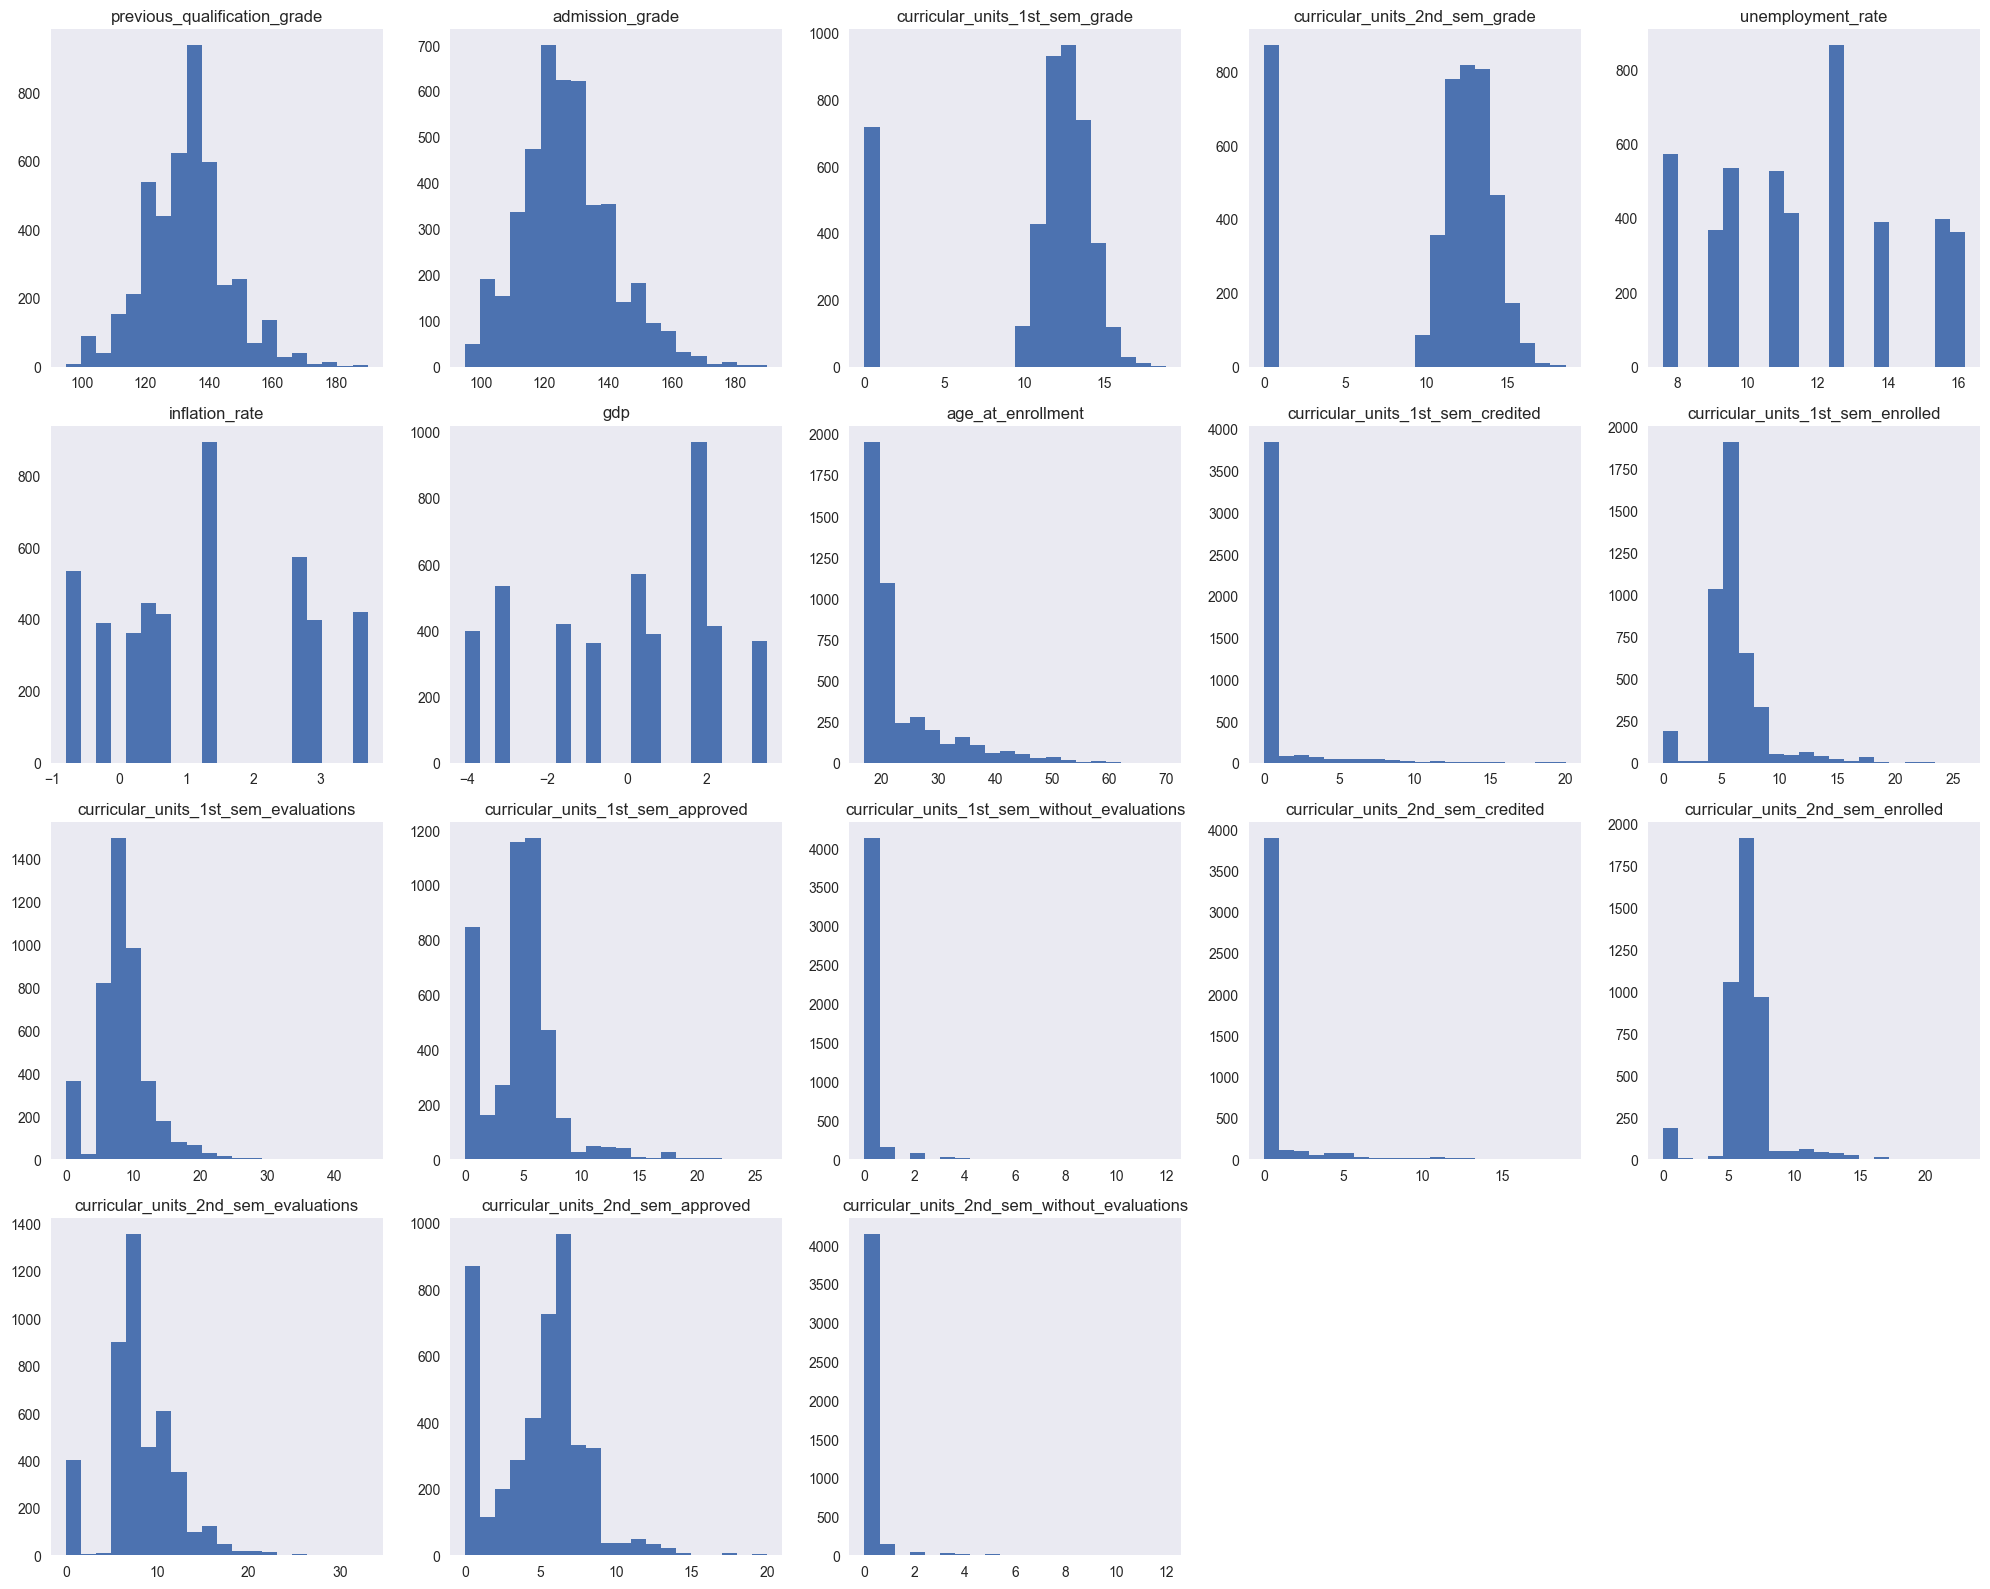

In [6]:
import warnings

# Ajustes globales
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
warnings.filterwarnings("ignore", message="Glyph.*missing")

OUTPUT_DIR = "../outputs/figures/EDA/1_numericas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"01_distribucion_variables_numericas.png"
filepath = os.path.join(OUTPUT_DIR, filename)

# Calcular número de filas necesarias para 5 columnas
n_vars = len(VARS_NUMERICAS)
n_cols = 5
n_rows = (n_vars // n_cols) + (1 if n_vars % n_cols != 0 else 0)

# Histograma de todas las columnas numéricas con 5 columnas
df[VARS_NUMERICAS].hist(bins=20, figsize=(20, 16), grid=False, layout=(n_rows, n_cols))
plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

Diagramas de cajas

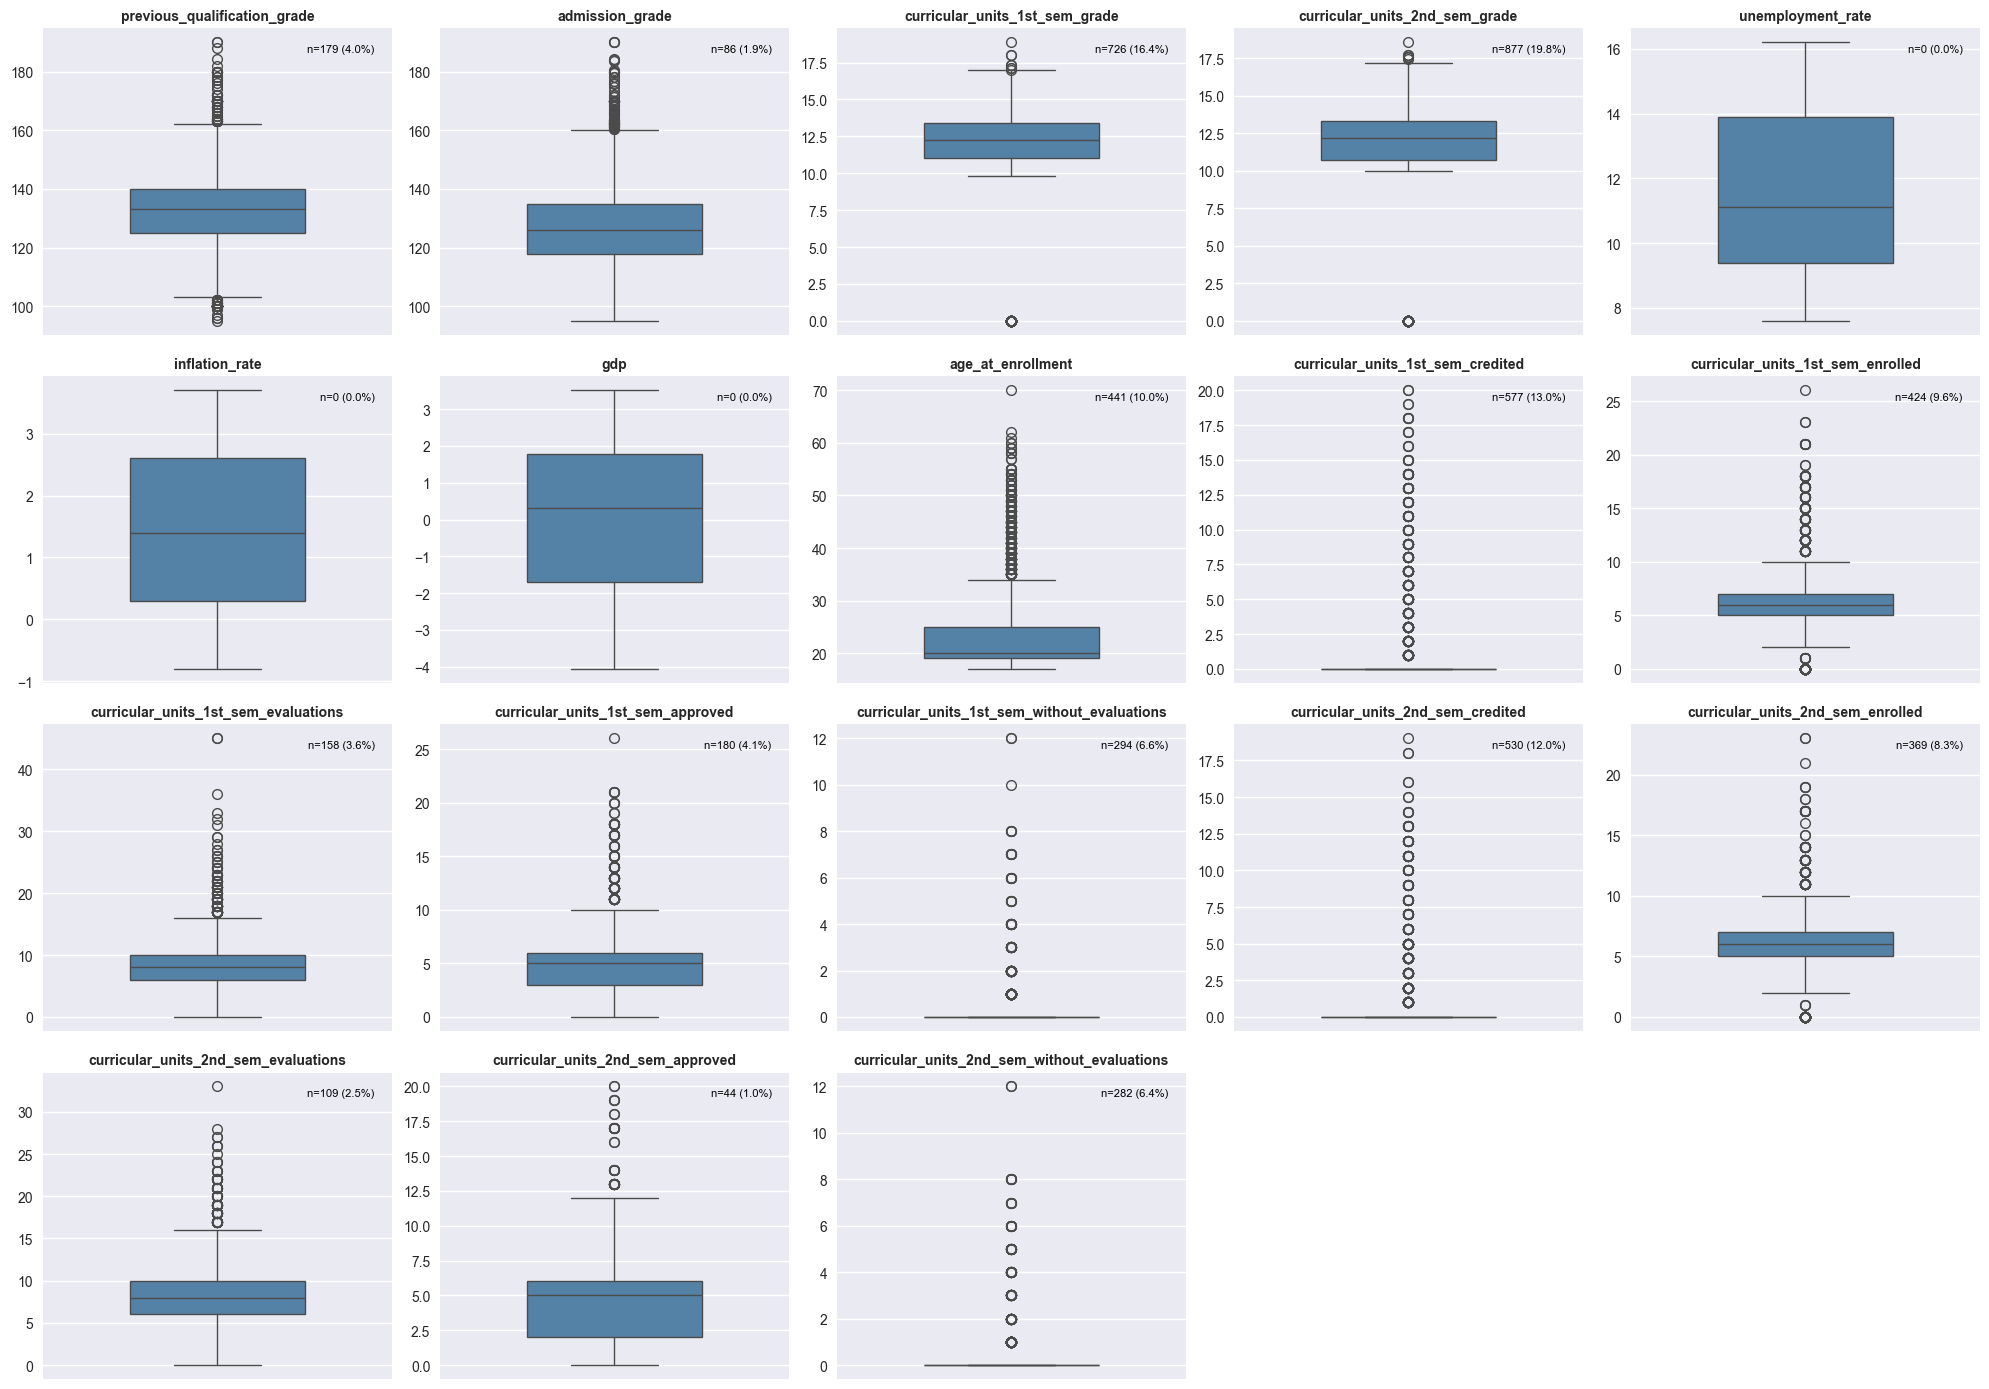

In [7]:
# Boxplots con Seaborn
n_vars = len(VARS_NUMERICAS)
n_cols = 5
n_rows = (n_vars // n_cols) + (1 if n_vars % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 14))
axes = axes.flatten()

OUTPUT_DIR = "../outputs/figures/EDA/1_numericas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"02_boxplot_variables_numericas.png"
filepath = os.path.join(OUTPUT_DIR, filename)

for i, col in enumerate(VARS_NUMERICAS):
    ax = axes[i]
    sns.boxplot(y=df[col], ax=ax, color='steelblue', width=0.5)
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_ylabel('')
    
    # Agregar información de outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    pct = (n_outliers / len(df)) * 100
    
    ax.annotate(f'n={n_outliers} ({pct:.1f}%)', xy=(0.95, 0.95), xycoords='axes fraction',
                ha='right', va='top', fontsize=8, color='black')

# Ocultar subplots vacíos
for j in range(len(VARS_NUMERICAS), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

#### 3.1.2. Análisis BIVARIADO

Matriz de correlación

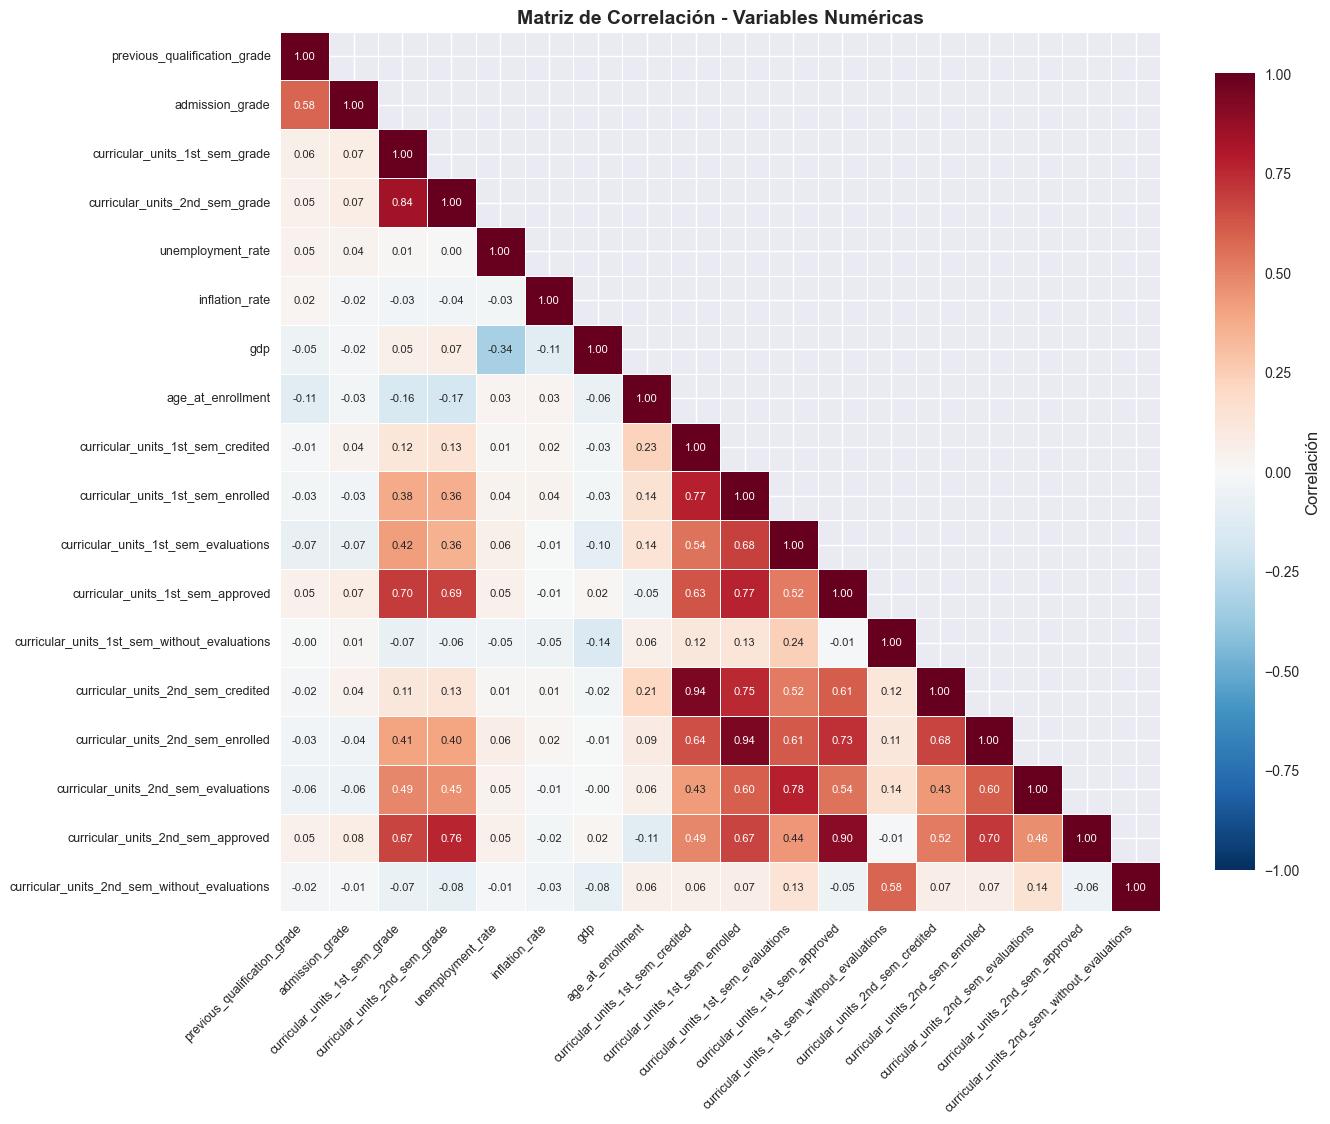

In [8]:
# Calcular matriz de correlación
corr_matrix = df[VARS_NUMERICAS].corr()

# Visualización: Heatmap completo
fig, ax = plt.subplots(figsize=(14, 12))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Correlación'},
            annot_kws={'size': 8}, ax=ax)

ax.set_title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)

OUTPUT_DIR = "../outputs/figures/EDA/1_numericas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"03_correlation_matrix_variables_numericas.png"
filepath = os.path.join(OUTPUT_DIR, filename)

plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

Diagramas de caja - Variables numéricas versus target

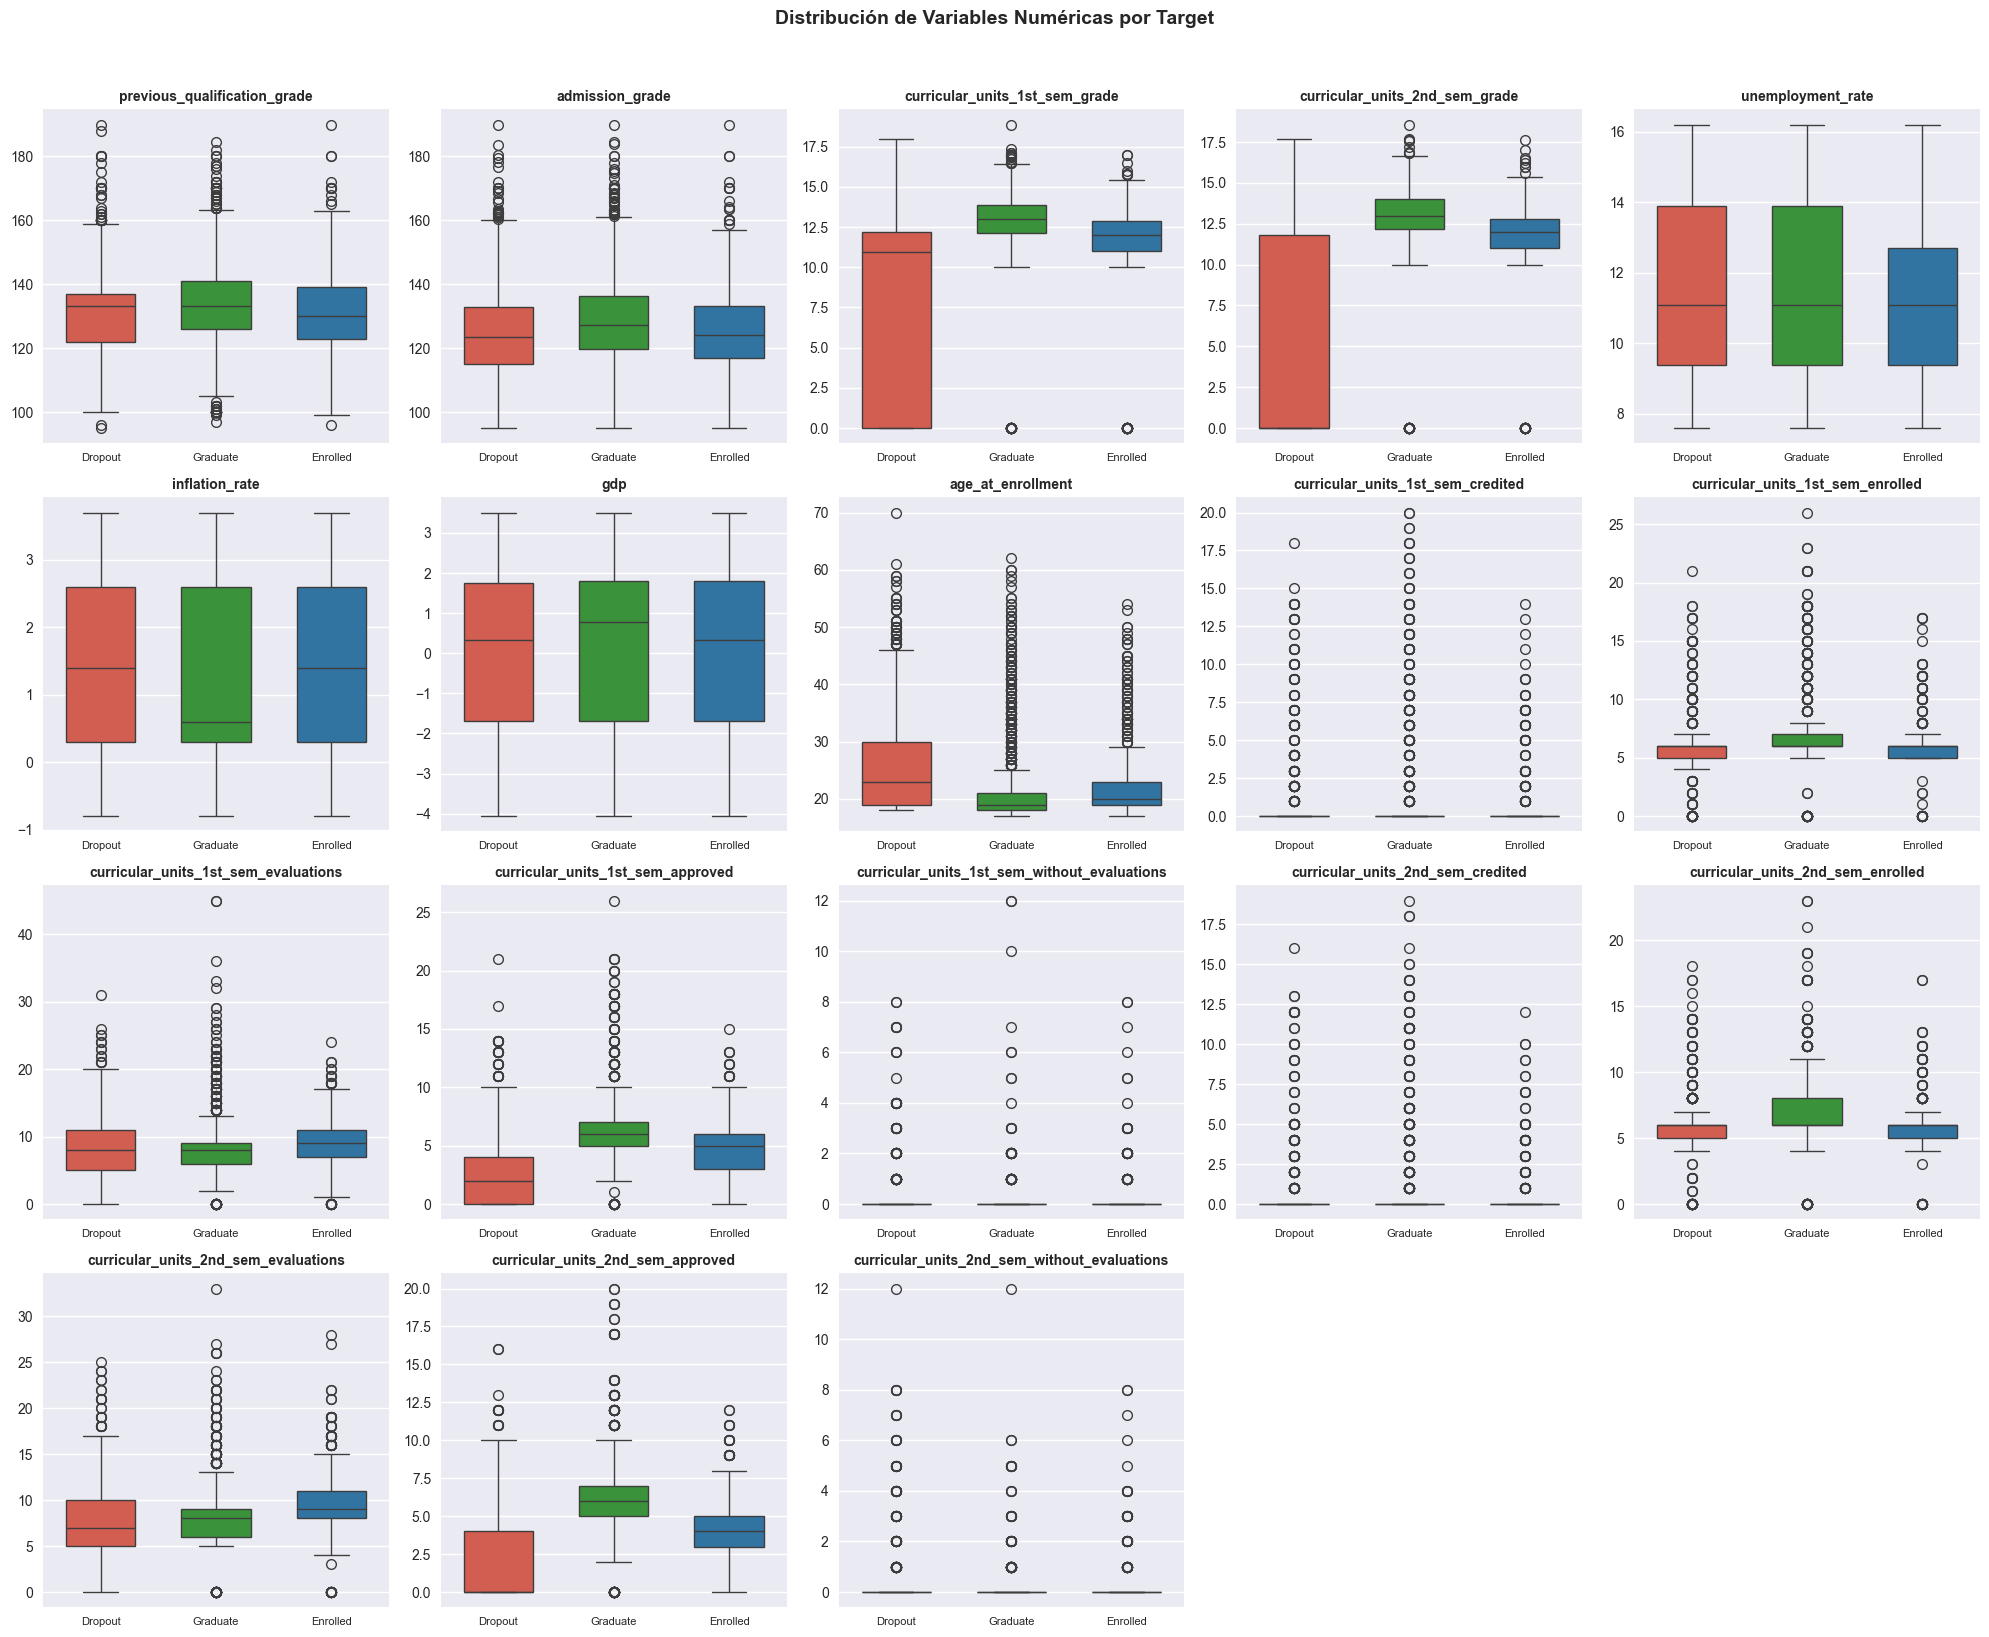

In [9]:
# Boxplots por Target (para ver diferencias entre clases)
n_vars = len(VARS_NUMERICAS)
n_cols = 5
n_rows = (n_vars // n_cols) + (1 if n_vars % n_cols != 0 else 0)

OUTPUT_DIR = "../outputs/figures/EDA/1_numericas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"04_boxplot_variables_numericas_by_target.png"
filepath = os.path.join(OUTPUT_DIR, filename)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))
axes = axes.flatten()

colors = {'Dropout': '#E74C3C', 'Enrolled': '#1f77b4', 'Graduate': '#2ca02c'}


for i, col in enumerate(VARS_NUMERICAS):
    ax = axes[i]
    sns.boxplot(x='target', y=col, data=df, ax=ax, 
                hue='target', palette=colors, width=0.6, legend=False)
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=8)

# Ocultar subplots vacíos
for j in range(len(VARS_NUMERICAS), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribución de Variables Numéricas por Target', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()


#### 3.1.3 Conclusion variables numércias

1. Distribuciones. Se debe evaluar potencial transformación de ser necesario de acuerdo al algoritmo.
- Las variables que presentan asimetrias positivas y sesgos extremos son:age_at_enrollment, curricular_units_1st_sem_credited, curricular_units_1st_sem_without_evaluations, curricular_units_2nd_sem_without_evaluations y curricular_units_2nd_sem_credited. Estas distribuciones sesgadas pueden requerir transformaciones (log, box-cox, power transform) dependiendo del algoritmo de modelado seleccionado.
- Las variables curricular_units_1st_sem_grade y curricular_units_2nd_sem_grade presentan una distribución bimodal con peak en 0 (no tiene calificaciones) y 12-14, existiendo dos poblaciones diferenciadas: estudiantes que no rinden evaluaciones y estudiantes activos con rendimiento normal.
- Las variables curricular_units_1st_sem_without_evaluations y curricular_units_2nd_sem_without_evaluations presentan una alta concetración en 0 (zero_inflated, pero es propio del conyexto), esto implica que la gran mayoria de los alumnos realiza los exámenes, siendo un signo de estuadiante activo, se debe evaluar transformación de ser necesario.
- Las variables curricular_units_1st_sem_credited y curricular_units_2nd_sem_credited presentan una alta concetración en 0  (zero_inflated, pero es propio del conyexto), esto implica que la gran mayoria de los alumnos no convaidan ramos curados previamente, siendo un signo de estuadiante activocursando desde cero el grado.
- Las variables previous_qualification_grade y admission_grade presentan una distribución normal, curricular_units_1st_sem_enrolled y curricular_units_2nd_sem_enrolled presentan una distribución aproximadamente normal. Estas variables son adecuadas para algoritmos que suponen normalidad, sin necesidad de transformaciones adicionales.

2. Outliers.
- Las siguiente variables presentan alta tasas de valores fuera de rango calculado con IQR de 1.5 estas variables presentan maás de un 10%: curricular_units_2nd_sem_grade: 19.8% (877 outliers), curricular_units_1st_sem_grade: 16.4% (726 outliers), curricular_units_1st_sem_credited: 13.0% (577 outliers), curricular_units_2nd_sem_credited: 12.0% (530 outliers) y age_at_enrollment: 10.0% (441 outliers). Estos valores atípicos no necesariamente serán eliminados, ya que representan comportamientos reales del alumnado (rendimientos extremos o inscripciones/creditaciones inusuales). Pueden ser tratados mediante winsorization o técnicas robustas según el modelo, se decidirá en etapa de preprocesamiento.

3. Variables macroeconómicas (unemployment_rate, inflation_rate, gdp).
- Sin outliers (por definición).                                                 
- 9-10 valores únicos.
- Estas variables presentan bajo poder predictivo y probablemente aportarán poca ganancia al modelo.

4. Correlaciones
- ALTA (r > 0.7) 
    - 1st_sem_credited y 2nd_sem_credited:     r = 0.94
    - 1st_sem_enrolled y 2nd_sem_enrolled:     r = 0.94
    - 1st_sem_enrolled y 2nd_sem_credited:     r = 0.75
    - 1st_sem_approved y 2nd_sem_approved:     r = 0.90
    - 1st_sem_approved y 1st_sem_evaluations:  r = 0.77
    - 2nd_sem_approved y 2nd_sem_evaluations:  r = 0.78
    - 1st_sem_grade  2nd_sem_grade:           r = 0.84
    - 1st_sem_grade y 1st_sem_approved:        r = 0.70
    - 2nd_sem_grade y 2nd_sem_approved:        r = 0.76
    - Estas correlaciones indican que el rendimiento académico entre semestres es altamente consistente, y puede requerir reducción de dimensionalidad (PCA o selección de features).

- ALTA (0.5 < r < 0.7) 
    - 1st_sem_enrolled y 1st_sem_evaluations:  r = 0.68
    - 2nd_sem_enrolled y 2nd_sem_evaluations:  r = 0.60
    - 1st_sem_approved y 2nd_sem_enrolled:     r = 0.61
    - previous_qual_grade y admission_grade:   r = 0.58
    - 1st_sem_without_eval y 2nd_sem_without:  r = 0.58

- BAJA (r < 0.3):
    - age_at_enrollment, baja correlación con casi todas
    - Variables macroeconómicas: casi sin correlación   

5. Análisis bivariado
- Las variables curricular_units_1st_sem_approved, curricular_units_2nd_sem_approved, curricular_units_1st_sem_grade y curricular_units_2nd_sem_grade poseen alto poder discriminativoy separan muy bien los grupos en lsa 3 clases.
- La variable age_at_enrollment es un buen predictor también, se conluye que a mayor edad (al momento de la matricula) mayor es el abandono.
- Las variables curricular_units_1st_sem_without_evaluations y curricular_units_2nd_sem_without_evaluations es una señal de abandono.
- La variable previous_qualification_grade y admission_grade tienen poder predictor pero leve ya que se presenta una diferencia leve en las medias de ambas variables.
- Las variables macroeconómicas (unemployment_rate, inflation_rate, gdp) no presentan diferencias visibles.
- El rendimiento en el primer semestre es el principal diferenciador entre clases del target
- La edad (age_at_enrollment) muestra leve relación: estudiantes mayores tienden levemente a mayor abandono.
- Patrones:
    - Estudiantes clasificados "Dropout", presentan menos aprobaciones en ambos semestres (curricular_units_1st_sem_approved y curricular_units_2nd_sem_approved), enores evaluaciones realizadas (curricular_units_1st_sem_evaluations y curricular_units_2nd_sem_evaluations), menores promedios de notas (curricular_units_1st_sem_grade y curricular_units_2nd_sem_grade), menores unidades inscritas (curricular_units_1st_sem_enrolled y curricular_units_2nd_sem_enrolled). 
    - Estudiantes clasificados "Graduate", presentan las mayores medianas en notas (curricular_units_1st_sem_grade y curricular_units_2nd_sem_grade), aprobaciones (curricular_units_1st_sem_approved y curricular_units_2nd_sem_approved) y cantidad de evaluaciones realizadas (curricular_units_2nd_sem_evaluations)
    - Estudiantes clasificados "Enrolled", se ubican en valores intermedios y tiene un comportamieno similar a Graduate pero con menor rendimiento general.

6. Conclusión

- El rendimiento académico temprano (primer semestre) es el principal predictor de la clasificación final del estudiante.
- Existen fuertes patrones de consistencia entre semestres, lo que sugiere que no todos los indicadores son necesarios, dado la multicolinealidad.
- Las variables con asimetría marcada y outliers deben considerarse para transformación, según el algoritmo elegido.
- Las variables macroeconómicas tienen poca influencia en el comportamiento estudiantil, mientras que los indicadores de participación académica y notas sí son altamente relevantes.
- La edad y la ausencia de evaluaciones aparecen como señales secundarias pero útiles para predecir riesgo de abandono.


### 3.2. Análisis variables binarias

#### 3.2.1. Análisis UNIVARIADO


Distribución de Variables Binarias:
------------------------------------------------------------------------------------------------
Variable                       Valor=0               N       %   Valor=1               N       %
------------------------------------------------------------------------------------------------
daytimeevening_attendance      Nocturno            483   10.9%   Diurno            3,941   89.1%
displaced                      No                1,998   45.2%   Sí                2,426   54.8%
educational_special_needs      No                4,373   98.8%   Sí                   51    1.2%
debtor                         No                3,921   88.6%   Sí                  503   11.4%
tuition_fees_up_to_date        No                  528   11.9%   Sí                3,896   88.1%
gender                         Femenino          2,868   64.8%   Masculino         1,556   35.2%
scholarship_holder             No                3,325   75.2%   Sí                1,099  

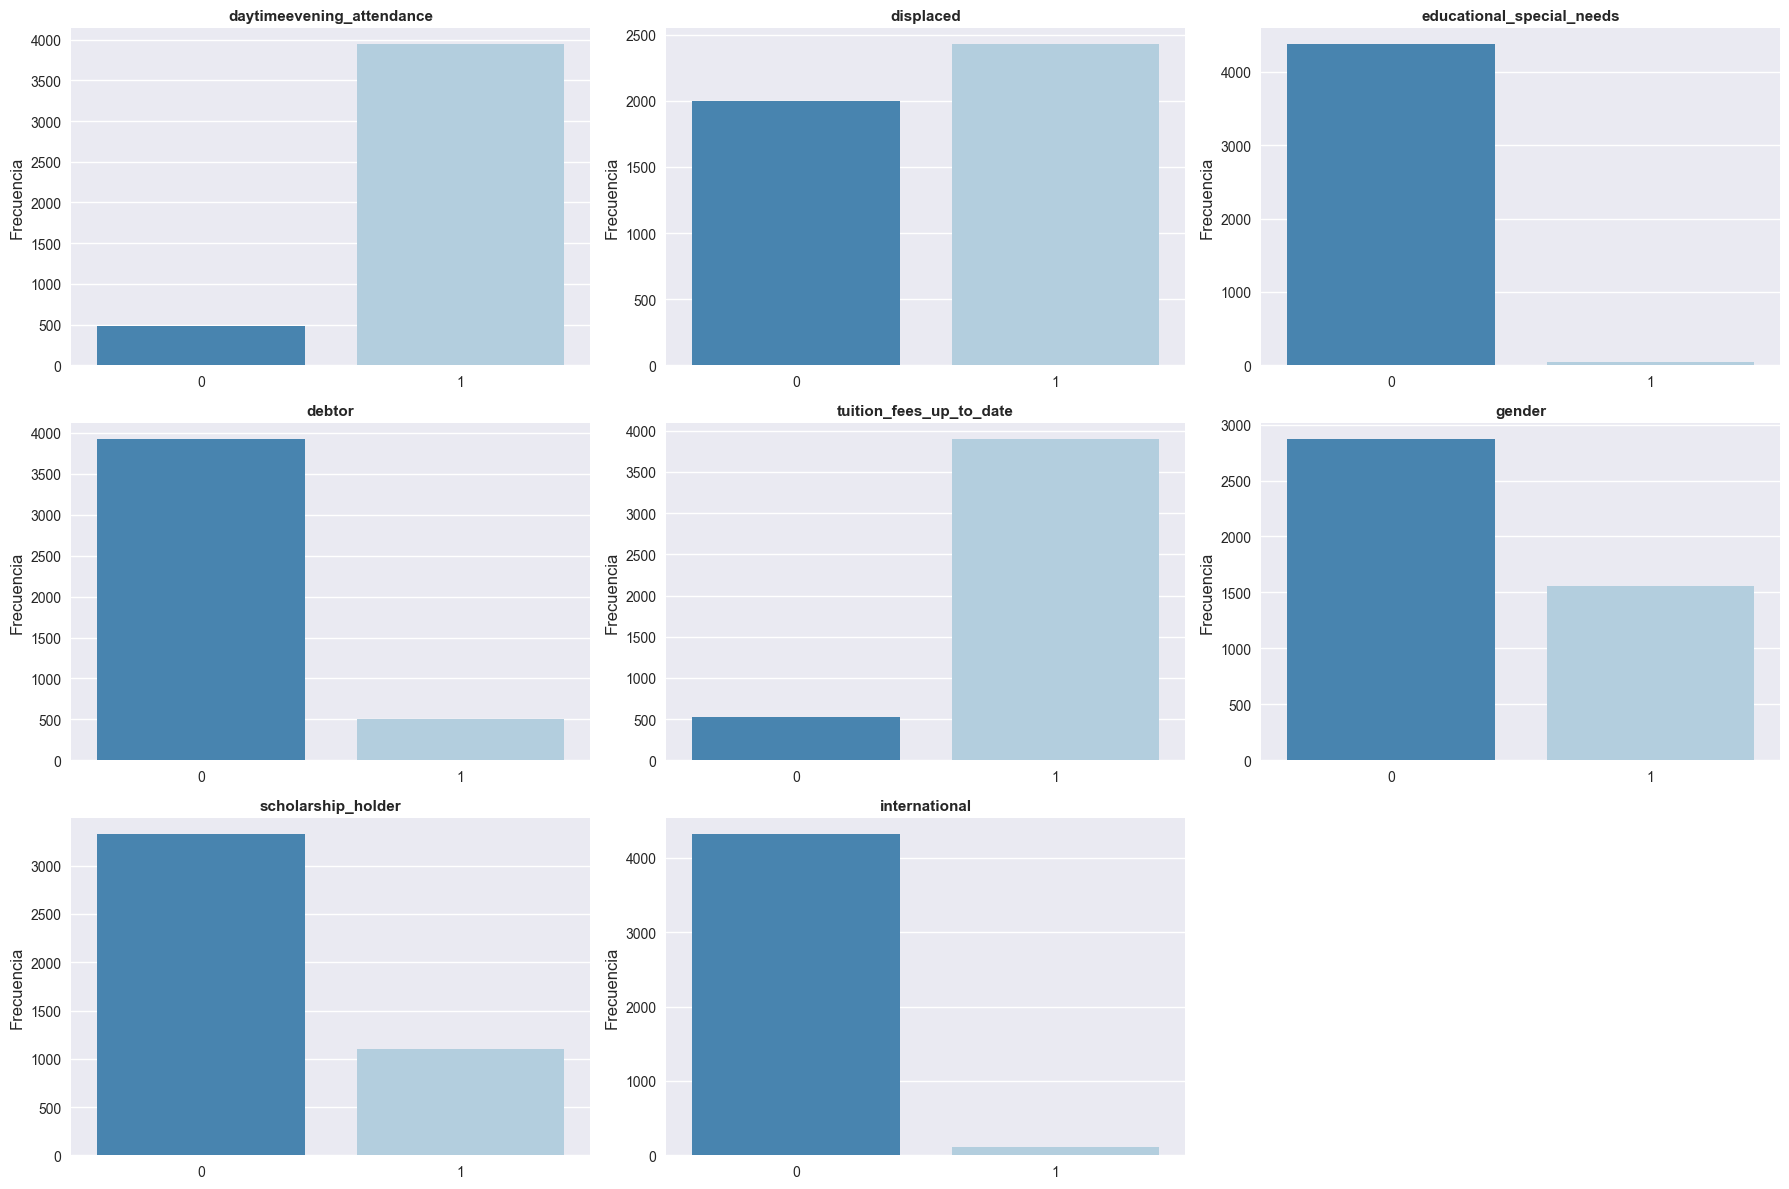

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
import math
import matplotlib.pyplot as plt
import seaborn as sns




# Crear DataFrame resumen
resume_vars = []


for var in VARS_BINARIAS:
    counts = df[var].value_counts().sort_index()
    n_0 = counts.get(0, 0)
    n_1 = counts.get(1, 0)
    pct_0 = (n_0 / len(df)) * 100
    pct_1 = (n_1 / len(df)) * 100
    
    labels = LABELS.get(var, {0: 'No', 1: 'Sí'})
    
    resume_vars.append({
        'Variable': var,
        'Label_0': labels[0],
        'N_0': n_0,
        '%_0': pct_0,
        'Label_1': labels[1],
        'N_1': n_1,
        '%_1': pct_1
    })

binary_df = pd.DataFrame(resume_vars)

print("\nDistribución de Variables Binarias:")
print("------------------------------------------------------------------------------------------------")
print(f"{'Variable':<30} {'Valor=0':<15} {'N':>7} {'%':>7}   {'Valor=1':<15} {'N':>7} {'%':>7}")
print("------------------------------------------------------------------------------------------------")

for _, row in binary_df.iterrows():
    print(f"{row['Variable']:<30} {row['Label_0']:<15} {row['N_0']:>7,} {row['%_0']:>6.1f}%   {row['Label_1']:<15} {row['N_1']:>7,} {row['%_1']:>6.1f}%")



def plot_categorical_univariate(df, cat_vars, n_cols=3):

    OUTPUT_DIR = "../outputs/figures/EDA/2_binarias/"
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    # Nombre archivo 
    filename = f"05_Grafico_barras_variables_binarias.png"
    filepath = os.path.join(OUTPUT_DIR, filename)
    
    n_vars = len(cat_vars)
    n_rows = math.ceil(n_vars / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_vars):
        ax = axes[i]

        counts = df[col].value_counts().sort_index()

        sns.barplot(x=counts.index.astype(str), y=counts.values, ax=ax, palette="Blues_r")

        ax.set_title(f"{col}", fontsize=11, fontweight='bold')
        ax.set_ylabel("Frecuencia")
        ax.set_xlabel("")
        
    # Ocultar subplots vacíos
    for j in range(n_vars, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()


# EJECUCIÓN
plot_categorical_univariate(df, VARS_BINARIAS, n_cols=3)

#### 3.2.2. Análisis BIVARIADO

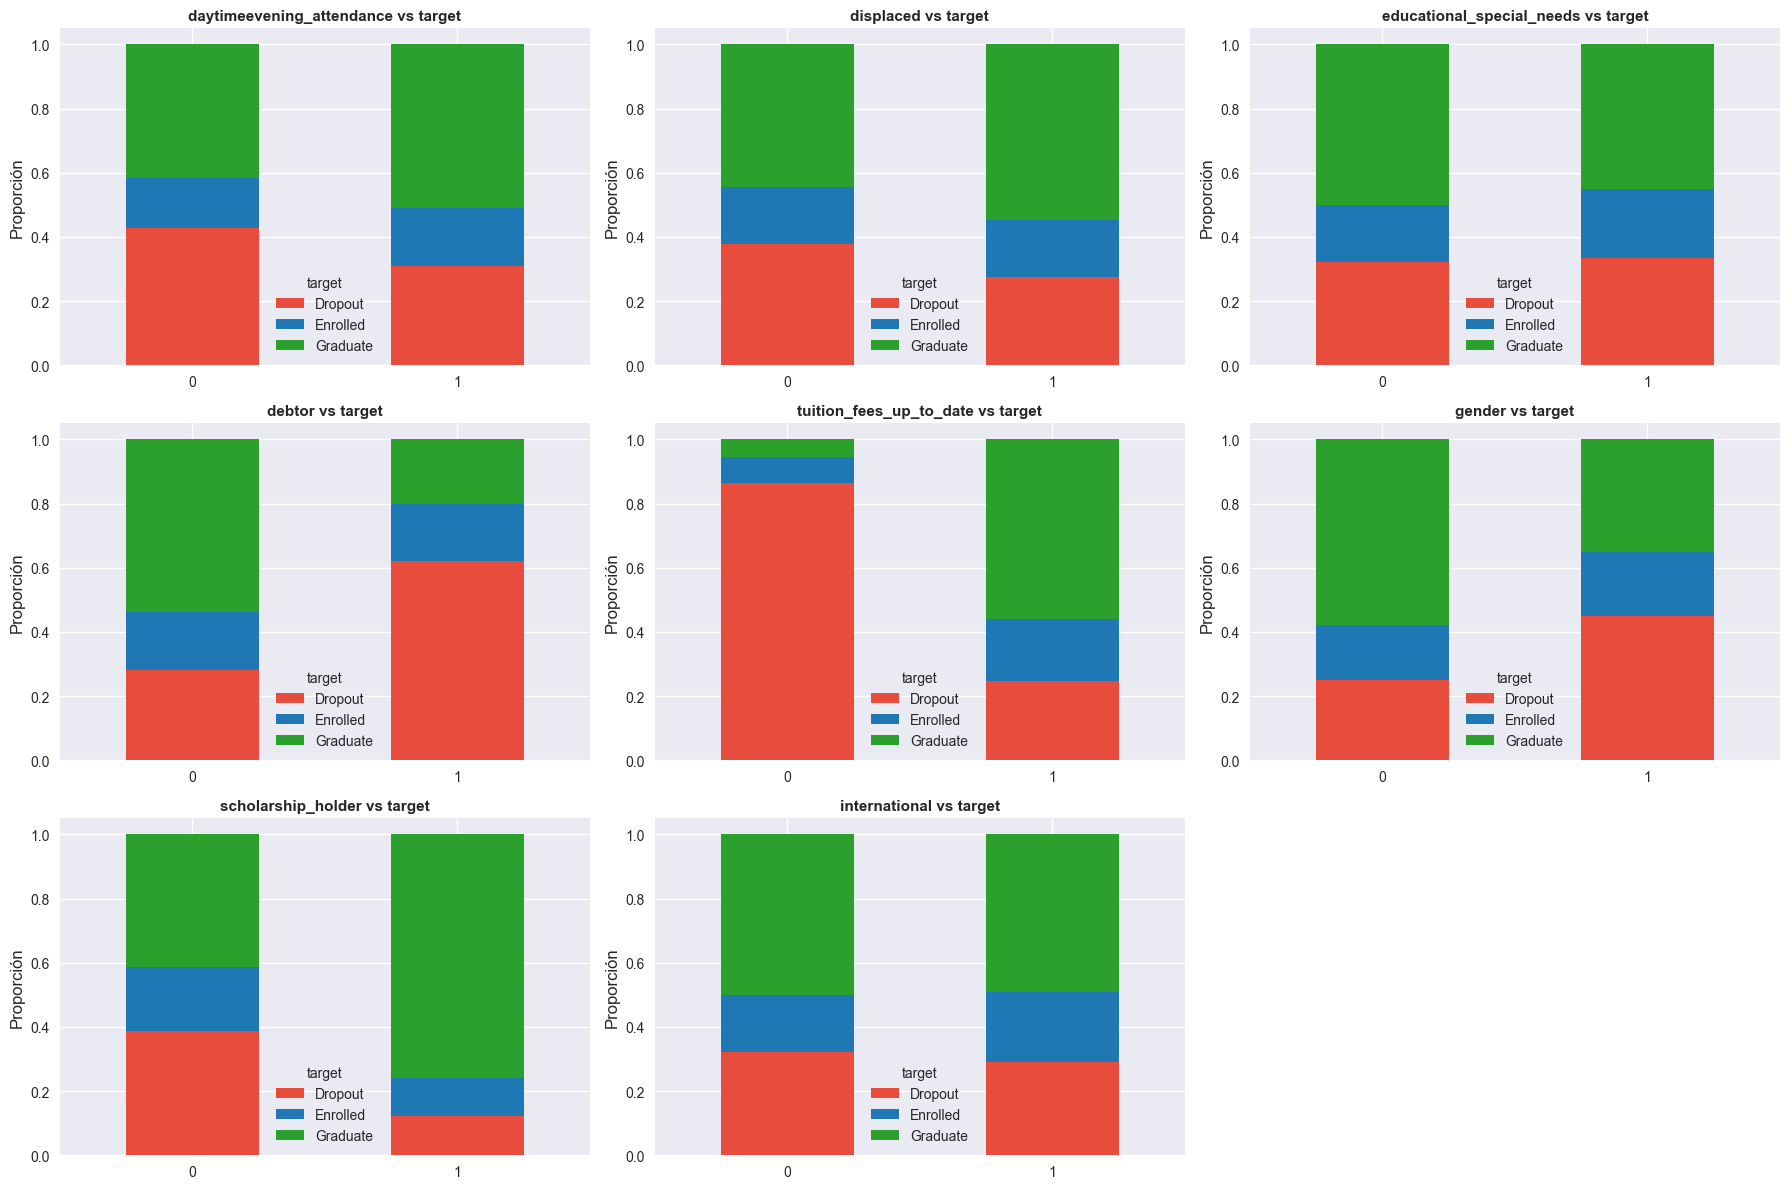

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Paleta consistente para todas las clases
palette = {
    "Dropout":"#E74C3C", 
    "Enrolled": "#1f77b4", 
    "Graduate": "#2ca02c"
}

def plot_categorical_bivariate(df, cat_vars, target="target", n_cols=3):

    OUTPUT_DIR = "../outputs/figures/EDA/2_binarias/"
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    # Nombre archivo 
    filename = f"06_Grafico_variables_binarias_by_target.png"
    filepath = os.path.join(OUTPUT_DIR, filename)

    n_vars = len(cat_vars)
    n_rows = math.ceil(n_vars / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_vars):
        ax = axes[i]

        # Tabla cruzada normalizada
        ctab = pd.crosstab(df[col], df[target], normalize='index')

        # Aplicar colores en el orden correcto de columnas
        ctab.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            color=[palette[c] for c in ctab.columns]  # 👈 colores personalizados
        )

        ax.set_title(f"{col} vs {target}", fontsize=11, fontweight='bold')
        ax.set_ylabel("Proporción")
        ax.set_xlabel("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

    # Ocultar gráficos sobrantes
    for j in range(n_vars, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

# EJECUCIÓN
plot_categorical_bivariate(df, VARS_BINARIAS)

#### 3.2.3 Conclusion preliminar EDA variables binarias
1. Variable Daytime/evening attendance (0 = nocturno, 1 = diurno). La mayoría (~90%) pertenece al turno diurno (1) y presentando una menor tasa de deserción. El horario de clases sí tiene relación con el desempeño, pero no es un predictor fuerte del abandono.
2. Variable Displaced (0 = no, 1 = sí). Se visualiza un equilibrio a nivel de categoria desplazado y no desplazado y una leve alza de la proporción de deserción en los no desplazados. No genera diferencias fuertes entre clases de target, en consecuencia, es una variable poco discriminativa.
3. Variable educational_special_needs (0 = no, 1 = sí). Casi todos los estudiantes están en 0 (sin necesidades especiales) y respecto de la relación con el target no hay diferencia al menos visualmente, no aporta información de utilidad. 
4. Variable debtor (0 = sin deudas, 1 = deudor). La mayoría (~90%) no presenta deuda y en los deudores la proporción de deserción es altísima (≈ 65%), es una de las variables más predictivas de abandono.
5. Variable tuition_fees_up_to_date (0 = no al día, 1 = al día). La mayoría (–90%) tiene su matrícula al día presenta, y de quienes no están al día la proporción de deserción es altísima (~90%%).Es, junto con debtor, la variable más predictiva del modelo.
6. Variable gender (0 = mujer, 1 = hombre). En los estudiantes hay más mujeres que hombres y estos último presentan una mayor tasa de deserción.
7. Variable scholarship_holder (0 = no, 1 = sí). La mayoría (~75%) no posee beca de estudios y el grupo que si presenta beca tiene una menor tasa de deserción. en consecuencia, funciona como factor protector contra abandono
8. Variable international (0 = nacional, 1 = internacional). Casi todos son nacionales (0) y la proporción por target es similar. Variable con poca fuerza predictiva.
9. Hallazgos principales:
    - Variables con mayor capacidad de predicción: debtor, tuition_fees_up_to_date y tuition_fees_up_to_date
    - Variables moderamenten informativas: daytimeevening_attendance y scholarship_holder
    - Variables poco relevantes: displaced, educational_special_needs y international

### 3.3. Análisis variables categóricas ordinales y nominales

#### 3.3.1. Análisis UNIVARIADO


 ---- Variable: MARITAL_STATUS ----



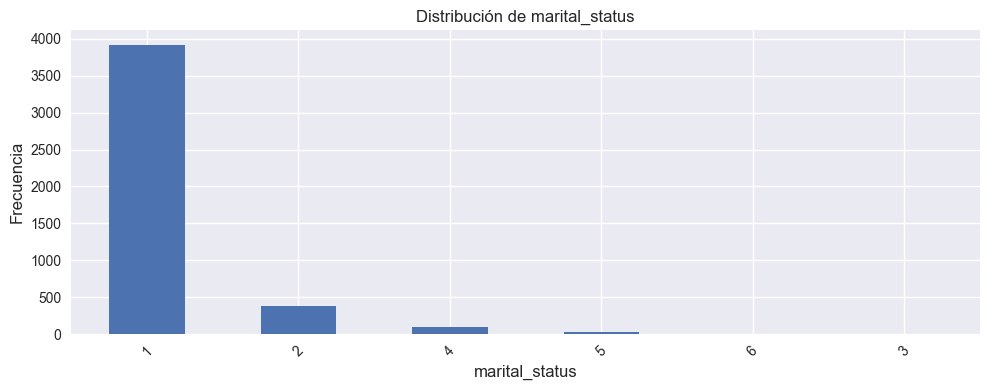

,Descripcion,N,Porcentaje (%)
marital_status,,,
1,Soltero,3919,88.58
2,Casado,379,8.57
4,Divorciado,91,2.06
5,Unión de hecho,25,0.57
6,Separado legalmente,6,0.14
3,Viudo,4,0.09



 ---- Variable: APPLICATION_MODE ----



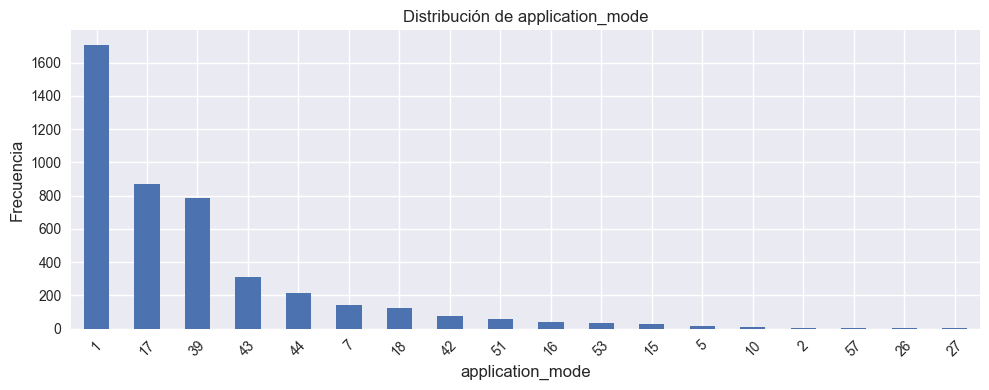

,Descripcion,N,Porcentaje (%)
application_mode,,,
1,1ra fase - contingente general,1708,38.61
17,2da fase - contingente general,872,19.71
39,Mayores de 23 años,785,17.74
43,Cambio de curso,312,7.05
44,Titulares técnicos superiores,213,4.81
7,Titulares otros cursos superiores,139,3.14
18,3ra fase - contingente general,124,2.80
42,Transferencia,77,1.74
51,Cambio institución/curso,59,1.33



 ---- Variable: COURSE ----



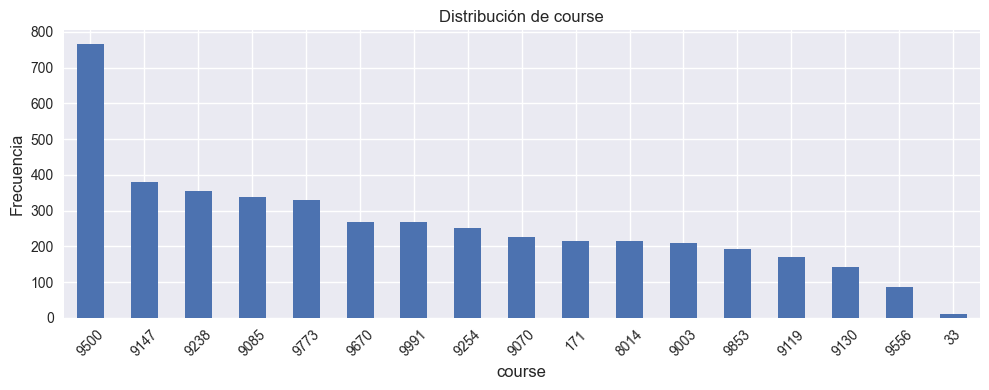

,Descripcion,N,Porcentaje (%)
course,,,
9500,Enfermería,766,17.31
9147,Gestión,380,8.59
9238,Servicio Social,355,8.02
9085,Enfermería Veterinaria,337,7.62
9773,Periodismo y Comunicación,331,7.48
9670,Gestión Publicidad y Marketing,268,6.06
9991,Gestión (nocturno),268,6.06
9254,Turismo,252,5.70
9070,Diseño Comunicación,226,5.11



 ---- Variable: PREVIOUS_QUALIFICATION ----



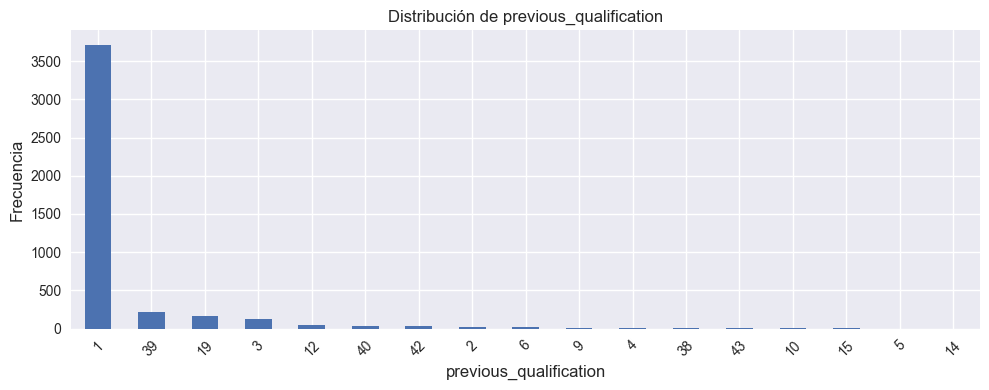

,Descripcion,N,Porcentaje (%)
previous_qualification,,,
1,Secundaria,3717,84.02
39,Especialización tecnológica,219,4.95
19,Ed. básica 3er ciclo,162,3.66
3,Superior - grado,126,2.85
12,Otro - 11º año,45,1.02
40,Superior - grado (1er ciclo),40,0.90
42,Técnico superior profesional,36,0.81
2,Superior - bachelor,23,0.52
6,Frecuencia ed. superior,16,0.36



 ---- Variable: NACIONALITY ----



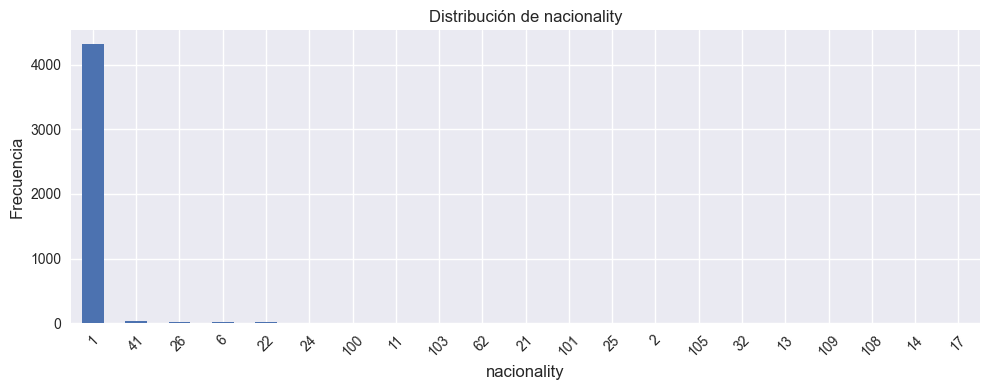

,Descripcion,N,Porcentaje (%)
nacionality,,,
1,Portugués,4314,97.51
41,Brasileño,38,0.86
26,Santotomense,14,0.32
6,Español,13,0.29
22,Caboverdiano,13,0.29
24,Guineano,5,0.11
100,Moldavo,3,0.07
11,Italiano,3,0.07
103,Ucraniano,3,0.07



 ---- Variable: MOTHERS_QUALIFICATION ----



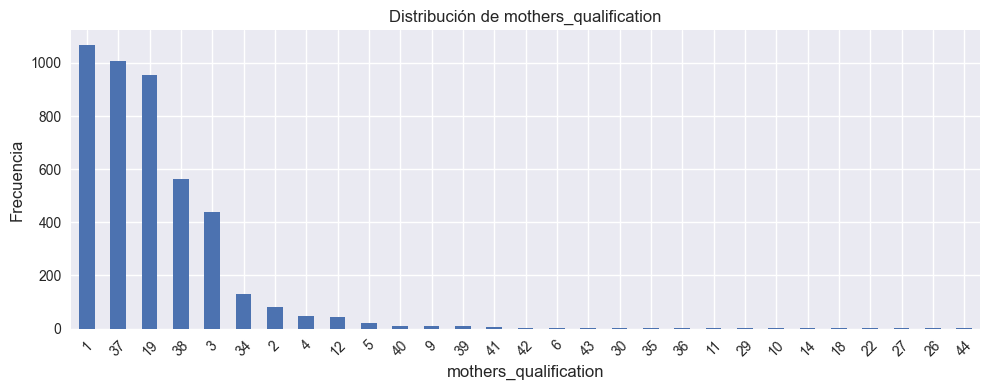

,Descripcion,N,Porcentaje (%)
mothers_qualification,,,
1,Secundaria (12º año),1069,24.16
37,Ed. básica 1er ciclo,1009,22.81
19,Ed. básica 3er ciclo,953,21.54
38,Ed. básica 2do ciclo,562,12.70
3,Superior - Grado,438,9.90
34,Desconocido,130,2.94
2,Superior - Bachelor,83,1.88
4,Superior - Máster,49,1.11
12,Otro - 11º año,42,0.95



 ---- Variable: FATHERS_QUALIFICATION ----



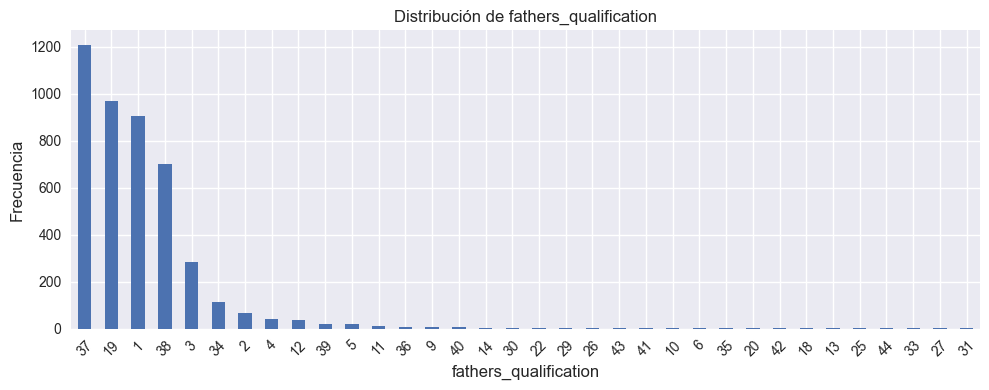

,Descripcion,N,Porcentaje (%)
fathers_qualification,,,
37,Ed. básica 1er ciclo,1209,27.33
19,Ed. básica 3er ciclo,968,21.88
1,Secundaria (12º año),904,20.43
38,Ed. básica 2do ciclo,702,15.87
3,Superior - Grado,282,6.37
34,Desconocido,112,2.53
2,Superior - Bachelor,68,1.54
4,Superior - Máster,39,0.88
12,Otro - 11º año,38,0.86



 ---- Variable: MOTHERS_OCCUPATION ----



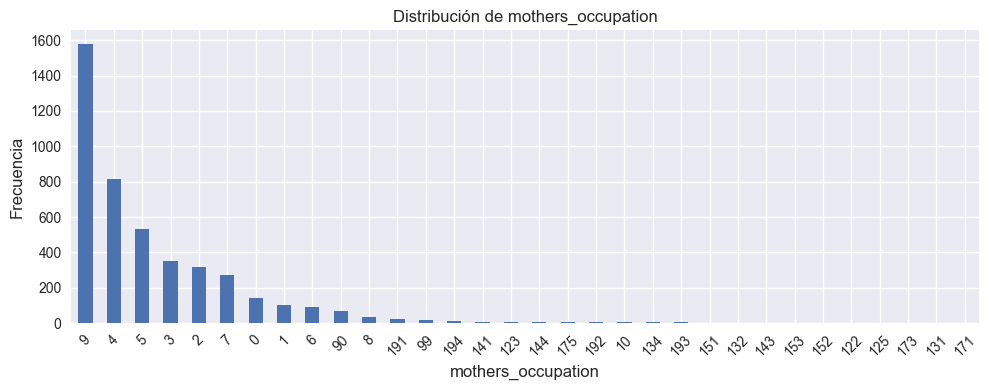

,Descripcion,N,Porcentaje (%)
mothers_occupation,,,
9,Trabajadores no cualificados,1577,35.65
4,Personal administrativo,817,18.47
5,Servicios/Seguridad/Vendedores,530,11.98
3,Técnicos nivel intermedio,351,7.93
2,Especialistas intelectuales,318,7.19
7,Trabajadores industria/construcción,272,6.15
0,Estudiante,144,3.25
1,Directivos/Ejecutivos,102,2.31
6,Agricultores/Pesca/Forestal,91,2.06



 ---- Variable: FATHERS_OCCUPATION ----



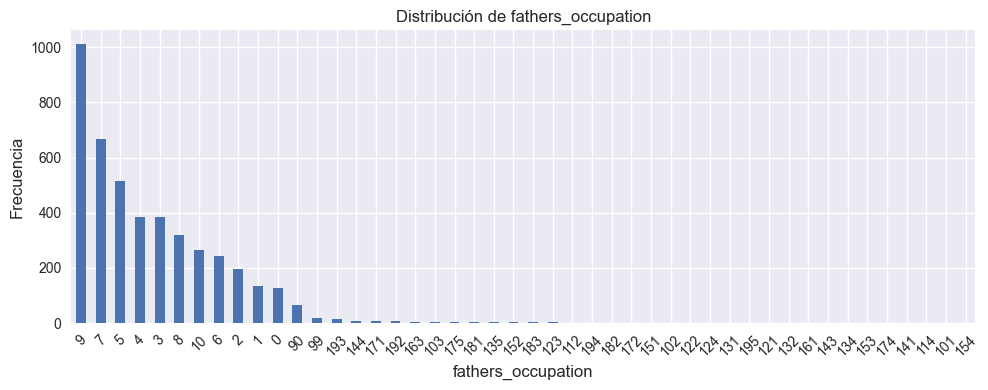

,Descripcion,N,Porcentaje (%)
fathers_occupation,,,
9,Trabajadores no cualificados,1010,22.83
7,Trabajadores industria/construcción,666,15.05
5,Servicios/Seguridad/Vendedores,516,11.66
4,Personal administrativo,386,8.73
3,Técnicos nivel intermedio,384,8.68
8,Operadores máquinas,318,7.19
10,Fuerzas armadas,266,6.01
6,Agricultores/Pesca/Forestal,242,5.47
2,Especialistas intelectuales,197,4.45



 ---- Variable: APPLICATION_ORDER ----



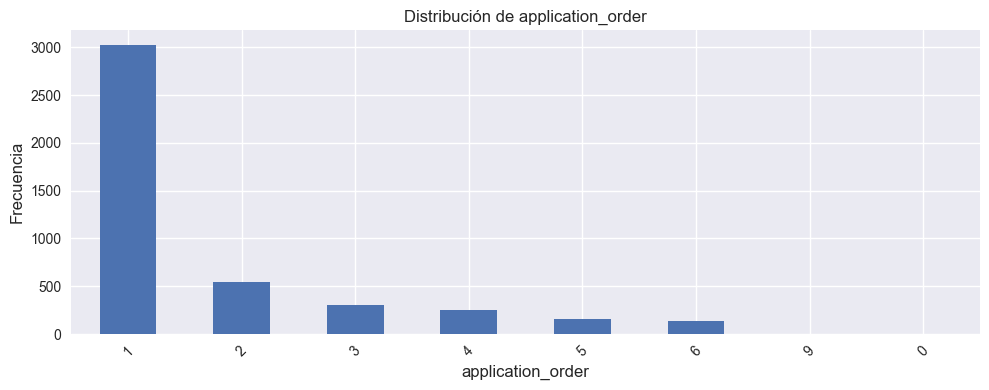

,Descripcion,N,Porcentaje (%)
application_order,,,
1,2da opción,3026,68.40
2,3ra opción,547,12.36
3,4ta opción,309,6.98
4,5ta opción,249,5.63
5,6ta opción,154,3.48
6,7ma opción,137,3.10
9,Última opción,1,0.02
0,1ra opción,1,0.02


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

OUTPUT_DIR = "../outputs/figures/EDA/3_categoricas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)



def plot_categorico_univariado(df, column):
    plt.figure(figsize=(10,4))
    
    df[column].value_counts().plot(kind='bar')
    
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()

    filename = f"07_univariado_{column}.png"
    filepath = os.path.join(OUTPUT_DIR, filename)
    # Guardar imagen
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

    # =================================================================
    # TABLA CON PROPORCIÓN
    # =================================================================
   
    # Crear tabla resumen
    summary = pd.DataFrame({
        'N': df[column].value_counts(),
        'Porcentaje (%)': (df[column].value_counts(normalize=True) * 100).round(2)
    })

    # Agregar descripción
    if column in LABELS:
        summary['Descripcion'] = summary.index.map(LABELS[column])
        # Reordenar columnas para que Descripcion esté primero
        summary = summary[['Descripcion', 'N', 'Porcentaje (%)']]
        
    # Ordenar por N descendente
    summary = summary.sort_values('N', ascending=False)
    display(summary)

VARS_CATEGORICAS = VARS_CATEGORICAS_NOMINALES + VARS_CATEGORICAS_ORDINALES

# Ejecutar para todas las variables categóricas
for col in VARS_CATEGORICAS:
    print(f"\n ---- Variable: {col.upper()} ----\n")
    plot_categorico_univariado(df, col)

##### 3.3.1.1 Análisis UNIVARIADO - Conclusiones preliminares

1. Variable marital_status (6 categorías). Las 2 categorías más representativas son 1 (soltero) con un 89% y 2 (casado) con un 9%. Las demás categorías tiene un porcentaje menor al 3%, no representativo. Esto podría implicar agrupación de categorías y binarizar categorías resultantes (de ser 2). Se debe continuar con el análisis bivariado para analizar la variabilidad respecto del target.

2. Variable application_mode(18 categorias). Las 3 categorías más representativas (76% del dataset) son 1 (1ra fase - contingente general) con un 39%, 17 (2da fase - contingente general) con un 20% y 39 (Mayor de 23 años) con un 18%. Las demás categorías tiene un porcentaje menor al 8%, no representativo.

3. Variable course (17 categorías). Relativamente balanceadas (todas mayor a 100 registros) y solo se visualiza un caso atípico (33, 'Biofuel Production Technologies' con 12 casos), las 3 categorías más representativas son 9500 (Nursing) con un 17%, 9147 (Management) con un 9%, 9085 (Social Service) con un 8% y 9773 (Journalism and Communication) con un 7%.

4. Variable nacionality. (21 categorias). La nacionalidad 1 (Portugués) representa el 98% de los estudiantes, 19 nacionalidades restantes no superan los 20 registros, la gran mayoria tiene menos de 5, a nivel estadístico no aportará información al modelo. 

5. Variable previous_qualification (17 categorías). La categoría 1 (Educación secundaria) domina con un 84% y 16% tiene otra cualificación, de estas ultimas 7 categorías presentan
menos de 10 registros para tener en cuenta en una eventual agrupación. Para 39 (Especialización tecnológica), 19 (Ed. básica 3er ciclo) y 3 (Ed. superior - grado) presentan más de 100 registros.

6. Variable fathers_qualification(34 categorías). Top 4 categorías = 85.5% del dataset: 37 (Ed. básica 1er ciclo) 27%, 19 (Ed. básica 3er ciclo) 22%, 1 (Secundaria (12º año)) 20%,
38 (Ed. básica 2do ciclo) 16%.  22 categorías con N < 10 registros y 6 de estas con N=1.  Educación de padres alcanza un 65% de educación básica (37 + 19 + 38) y secundaria completa un  20% (1). Se detecta 5 categorías (13, 20, 25 ,31, 33) con valores nulos. Requiere agrupación obligatoria 

7. Variable mothers_qualification (29 categorías, 5 menos que fathers). Top 5 categorías = 91% del dataset:  1 (Secundaria (12º año)) 24%, 37 (Ed. básica 1er ciclo) 23%, 19 (Ed. básica 3er ciclo) 22%, 38 (Ed. básica 2do ciclo) 13% y 3(Superior - Grado) 10%. 19 categorías con N < 10 registros y 5 de estas con N=1.  Educación de madres alcanza un 57% de educación básica (37 + 19 + 38) y secundaria completa un 24.2% (mayor que los padres (20%)), más balanceada que fathers_qualification y requiere agrupación obligatoria. 

8. Variable mothers_occupation (32 categorías). Top 3 categorías = 66% del dataset: 9 (Trabajadores no cualificados) 36%, 4 (Personal administrativo) 18%, 5 (Servicios/Seguridad/Vendedores) 12%. 17 categorías con N < 10 registros y 4 de estas con N=1. Requiere agrupación obligatoria.

9. Variable fathers_occupation (46 categorías). Top 3 categorías = 46% del dataset: 9 (Trabajadores no cualificados) 23%, 7 (Trabajadores industria/construcción) 15%, 5 (Servicios/Seguridad/Vendedores) 12%. 32 categorías con N < 10 registros y 14 de estas con N=1. Requiere agrupación obligatoria.

10. Variable application_order (ordinal con 9 categorías). Presenta una distribución sesgada con dominancia de 1 categoría, dado es ordinal a mayor código menor es la preferencia del estudiante. Top 2 categorías = 80% del dataset: 1 (2da opción) 68%, 2 (3ra opción) 12%. Un registro atípico es que el código 0 (1ra opción), solo hay 1 estudiante y con 9 (Última opción) sucede lo mismo.

#### 3.3.2. Análisis BIVARIADO


===== MARITAL_STATUS vs TARGET =====


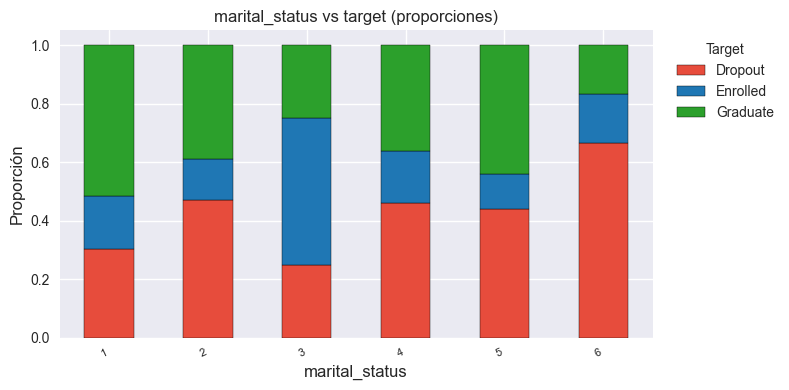

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
marital_status,,,,,,,,,
1,Soltero,3919,0.89,1184,30.21,720,18.37,2015,51.42
2,Casado,379,0.09,179,47.23,52,13.72,148,39.05
4,Divorciado,91,0.02,42,46.15,16,17.58,33,36.26
5,Unión de hecho,25,0.01,11,44.00,3,12.00,11,44.00
6,Separado legalmente,6,0.00,4,66.67,1,16.67,1,16.67
3,Viudo,4,0.00,1,25.00,2,50.00,1,25.00



===== APPLICATION_MODE vs TARGET =====


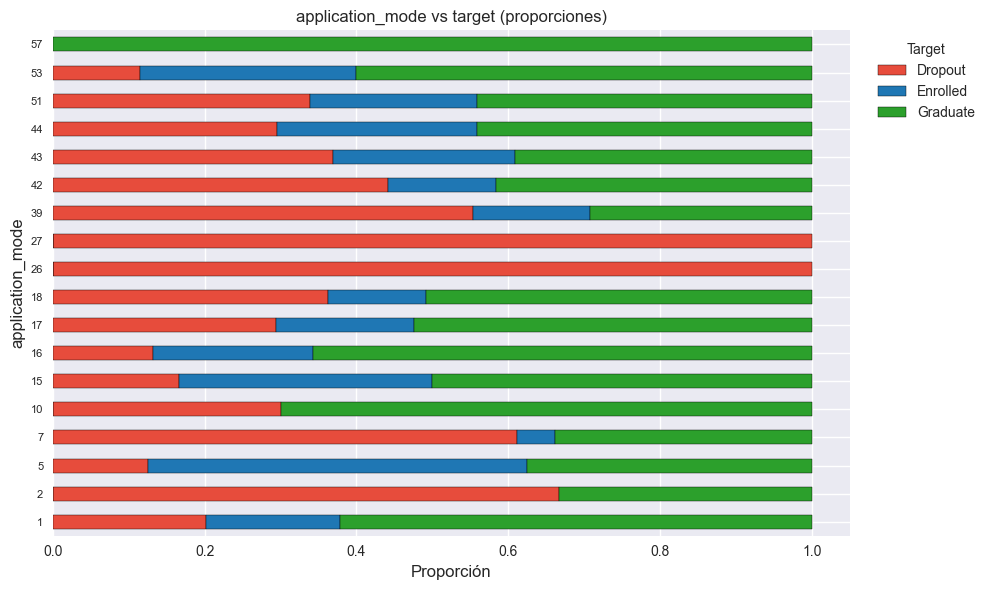

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
application_mode,,,,,,,,,
1,1ra fase - contingente general,1708,0.39,345,20.20,300,17.56,1063,62.24
17,2da fase - contingente general,872,0.20,256,29.36,159,18.23,457,52.41
39,Mayores de 23 años,785,0.18,435,55.41,121,15.41,229,29.17
43,Cambio de curso,312,0.07,115,36.86,75,24.04,122,39.10
44,Titulares técnicos superiores,213,0.05,63,29.58,56,26.29,94,44.13
7,Titulares otros cursos superiores,139,0.03,85,61.15,7,5.04,47,33.81
18,3ra fase - contingente general,124,0.03,45,36.29,16,12.90,63,50.81
42,Transferencia,77,0.02,34,44.16,11,14.29,32,41.56
51,Cambio institución/curso,59,0.01,20,33.90,13,22.03,26,44.07



===== COURSE vs TARGET =====


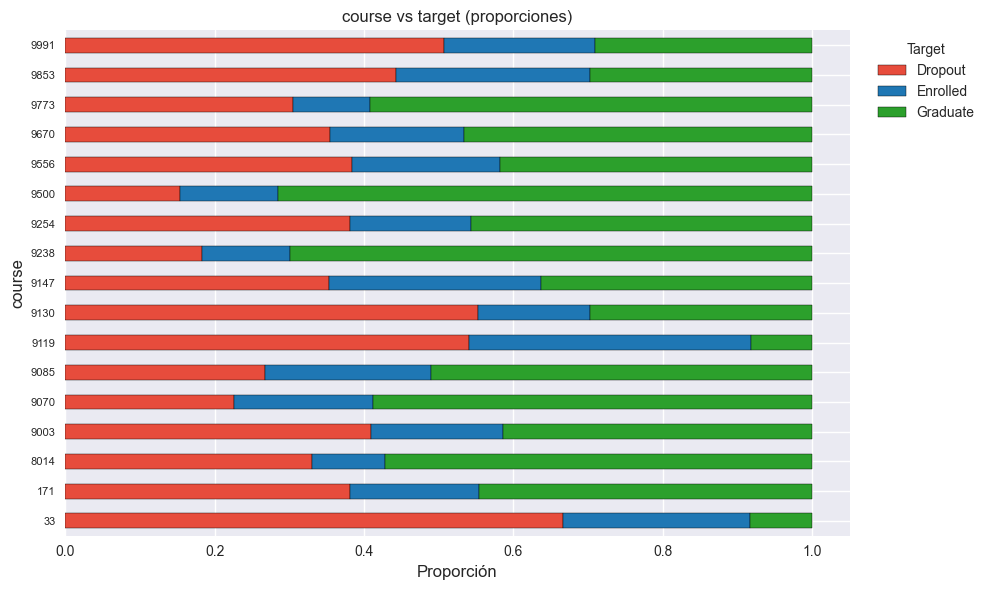

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
course,,,,,,,,,
9500,Enfermería,766,0.17,118,15.40,100,13.05,548,71.54
9147,Gestión,380,0.09,134,35.26,108,28.42,138,36.32
9238,Servicio Social,355,0.08,65,18.31,42,11.83,248,69.86
9085,Enfermería Veterinaria,337,0.08,90,26.71,75,22.26,172,51.04
9773,Periodismo y Comunicación,331,0.07,101,30.51,34,10.27,196,59.21
9991,Gestión (nocturno),268,0.06,136,50.75,54,20.15,78,29.10
9670,Gestión Publicidad y Marketing,268,0.06,95,35.45,48,17.91,125,46.64
9254,Turismo,252,0.06,96,38.10,41,16.27,115,45.63
9070,Diseño Comunicación,226,0.05,51,22.57,42,18.58,133,58.85



===== PREVIOUS_QUALIFICATION vs TARGET =====


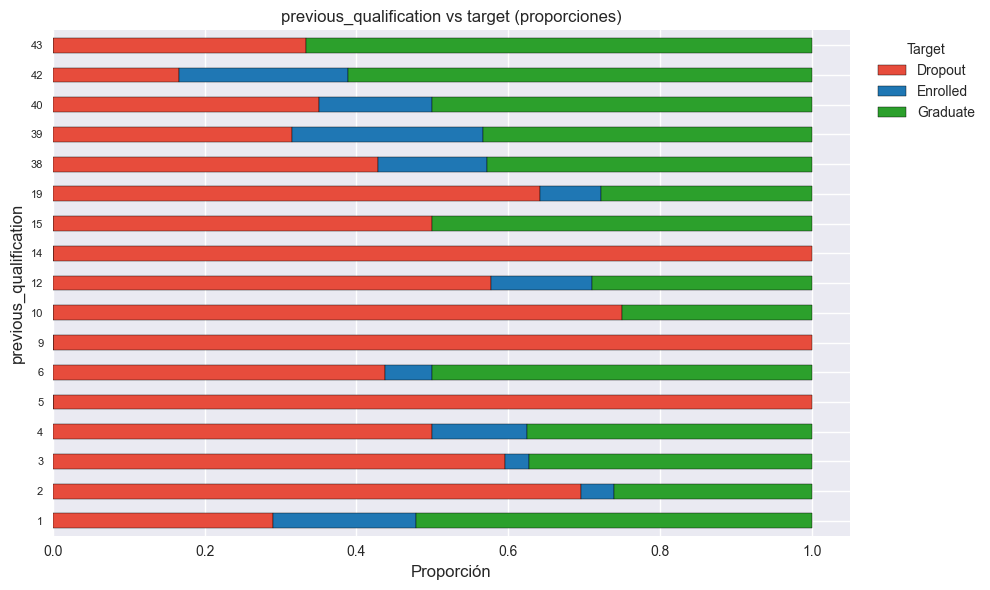

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
previous_qualification,,,,,,,,,
1,Secundaria,3717,0.84,1078,29.00,698,18.78,1941,52.22
39,Especialización tecnológica,219,0.05,69,31.51,55,25.11,95,43.38
19,Ed. básica 3er ciclo,162,0.04,104,64.20,13,8.02,45,27.78
3,Superior - grado,126,0.03,75,59.52,4,3.17,47,37.30
12,Otro - 11º año,45,0.01,26,57.78,6,13.33,13,28.89
40,Superior - grado (1er ciclo),40,0.01,14,35.00,6,15.00,20,50.00
42,Técnico superior profesional,36,0.01,6,16.67,8,22.22,22,61.11
2,Superior - bachelor,23,0.01,16,69.57,1,4.35,6,26.09
6,Frecuencia ed. superior,16,0.00,7,43.75,1,6.25,8,50.00



===== NACIONALITY vs TARGET =====


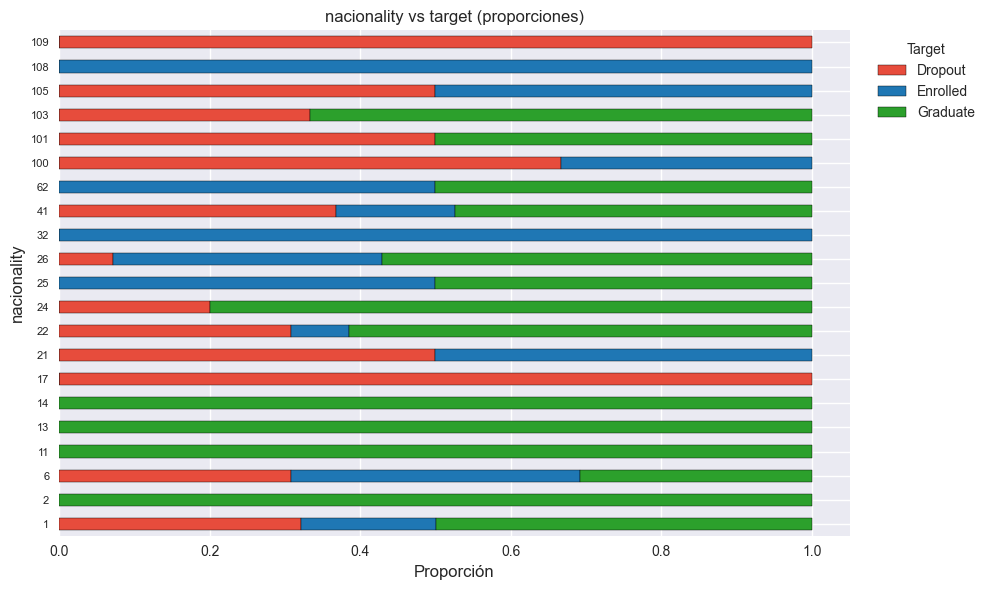

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
nacionality,,,,,,,,,
1,Portugués,4314,0.98,1389,32.20,770,17.85,2155,49.95
41,Brasileño,38,0.01,14,36.84,6,15.79,18,47.37
26,Santotomense,14,0.00,1,7.14,5,35.71,8,57.14
6,Español,13,0.00,4,30.77,5,38.46,4,30.77
22,Caboverdiano,13,0.00,4,30.77,1,7.69,8,61.54
24,Guineano,5,0.00,1,20.00,0,0.00,4,80.00
100,Moldavo,3,0.00,2,66.67,1,33.33,0,0.00
11,Italiano,3,0.00,0,0.00,0,0.00,3,100.00
103,Ucraniano,3,0.00,1,33.33,0,0.00,2,66.67



===== MOTHERS_QUALIFICATION vs TARGET =====


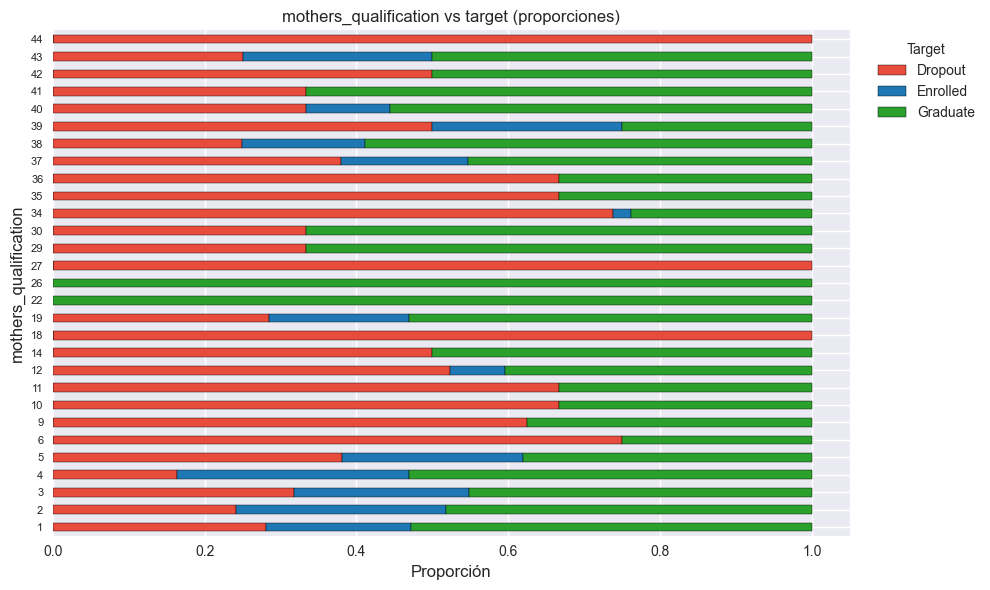

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
mothers_qualification,,,,,,,,,
1,Secundaria (12º año),1069,0.24,300,28.06,204,19.08,565,52.85
37,Ed. básica 1er ciclo,1009,0.23,383,37.96,169,16.75,457,45.29
19,Ed. básica 3er ciclo,953,0.22,271,28.44,176,18.47,506,53.10
38,Ed. básica 2do ciclo,562,0.13,140,24.91,91,16.19,331,58.90
3,Superior - Grado,438,0.10,139,31.74,101,23.06,198,45.21
34,Desconocido,130,0.03,96,73.85,3,2.31,31,23.85
2,Superior - Bachelor,83,0.02,20,24.10,23,27.71,40,48.19
4,Superior - Máster,49,0.01,8,16.33,15,30.61,26,53.06
12,Otro - 11º año,42,0.01,22,52.38,3,7.14,17,40.48



===== FATHERS_QUALIFICATION vs TARGET =====


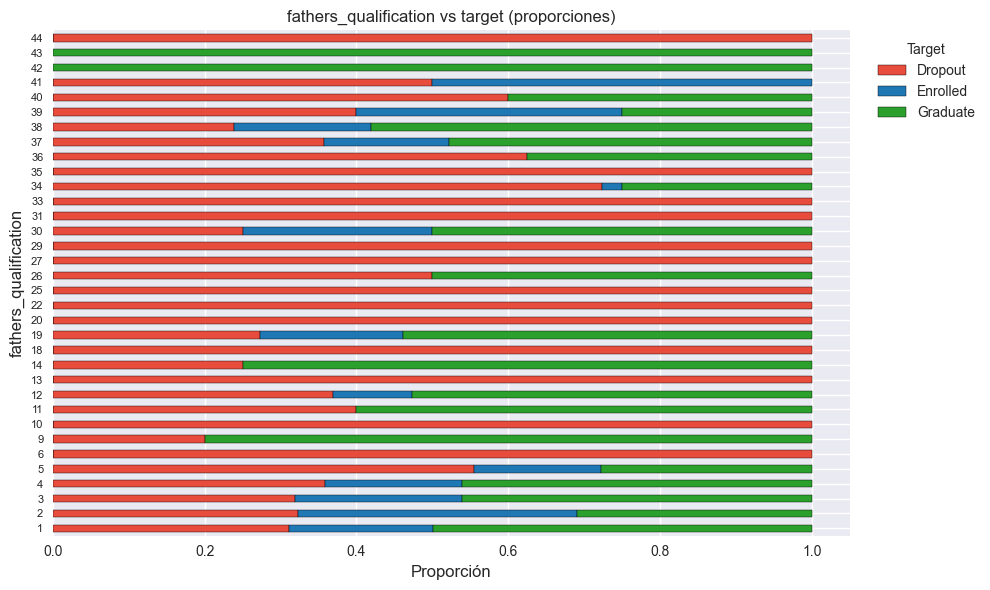

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
fathers_qualification,,,,,,,,,
37,Ed. básica 1er ciclo,1209,0.27,432,35.73,199,16.46,578,47.81
19,Ed. básica 3er ciclo,968,0.22,264,27.27,183,18.90,521,53.82
1,Secundaria (12º año),904,0.20,281,31.08,172,19.03,451,49.89
38,Ed. básica 2do ciclo,702,0.16,167,23.79,127,18.09,408,58.12
3,Superior - Grado,282,0.06,90,31.91,62,21.99,130,46.10
34,Desconocido,112,0.03,81,72.32,3,2.68,28,25.00
2,Superior - Bachelor,68,0.02,22,32.35,25,36.76,21,30.88
4,Superior - Máster,39,0.01,14,35.90,7,17.95,18,46.15
12,Otro - 11º año,38,0.01,14,36.84,4,10.53,20,52.63



===== MOTHERS_OCCUPATION vs TARGET =====


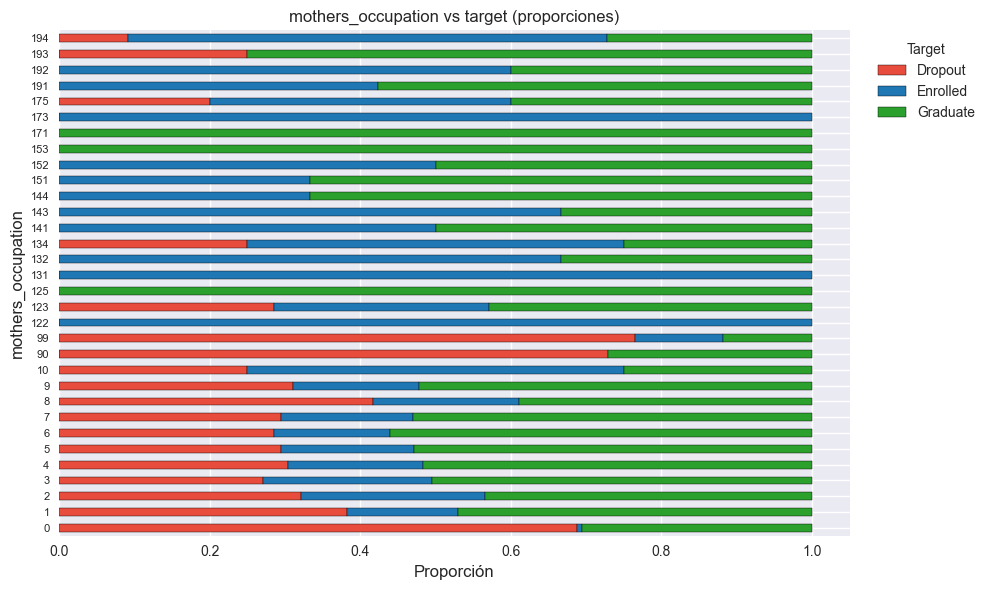

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
mothers_occupation,,,,,,,,,
9,Trabajadores no cualificados,1577,0.36,490,31.07,264,16.74,823,52.19
4,Personal administrativo,817,0.18,248,30.35,147,17.99,422,51.65
5,Servicios/Seguridad/Vendedores,530,0.12,156,29.43,94,17.74,280,52.83
3,Técnicos nivel intermedio,351,0.08,95,27.07,79,22.51,177,50.43
2,Especialistas intelectuales,318,0.07,102,32.08,78,24.53,138,43.40
7,Trabajadores industria/construcción,272,0.06,80,29.41,48,17.65,144,52.94
0,Estudiante,144,0.03,99,68.75,1,0.69,44,30.56
1,Directivos/Ejecutivos,102,0.02,39,38.24,15,14.71,48,47.06
6,Agricultores/Pesca/Forestal,91,0.02,26,28.57,14,15.38,51,56.04



===== FATHERS_OCCUPATION vs TARGET =====


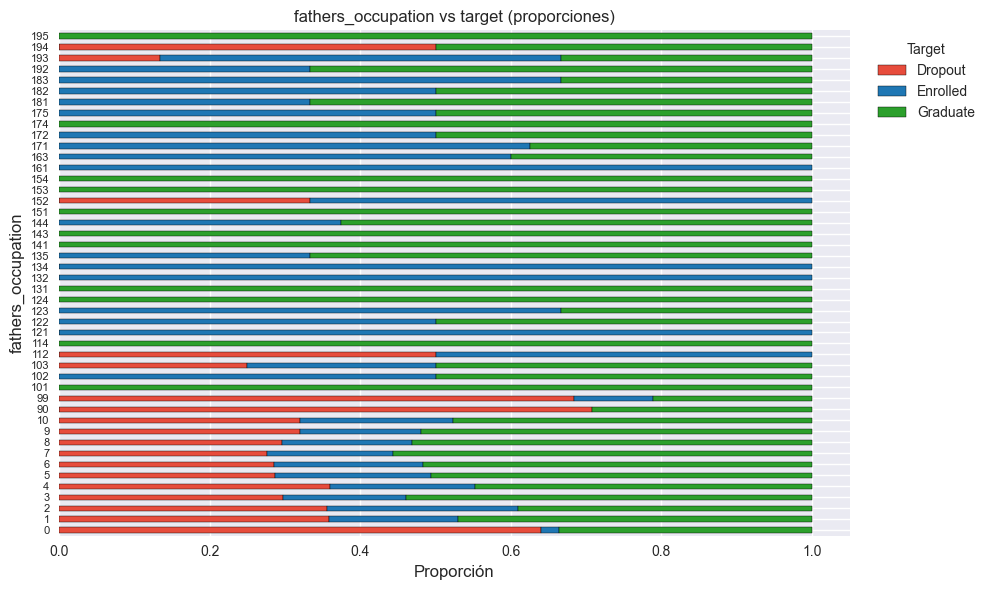

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
fathers_occupation,,,,,,,,,
9,Trabajadores no cualificados,1010,0.23,323,31.98,163,16.14,524,51.88
7,Trabajadores industria/construcción,666,0.15,184,27.63,111,16.67,371,55.71
5,Servicios/Seguridad/Vendedores,516,0.12,148,28.68,107,20.74,261,50.58
4,Personal administrativo,386,0.09,139,36.01,74,19.17,173,44.82
3,Técnicos nivel intermedio,384,0.09,114,29.69,63,16.41,207,53.91
8,Operadores máquinas,318,0.07,94,29.56,55,17.30,169,53.14
10,Fuerzas armadas,266,0.06,85,31.95,54,20.30,127,47.74
6,Agricultores/Pesca/Forestal,242,0.05,69,28.51,48,19.83,125,51.65
2,Especialistas intelectuales,197,0.04,70,35.53,50,25.38,77,39.09



===== APPLICATION_ORDER vs TARGET =====


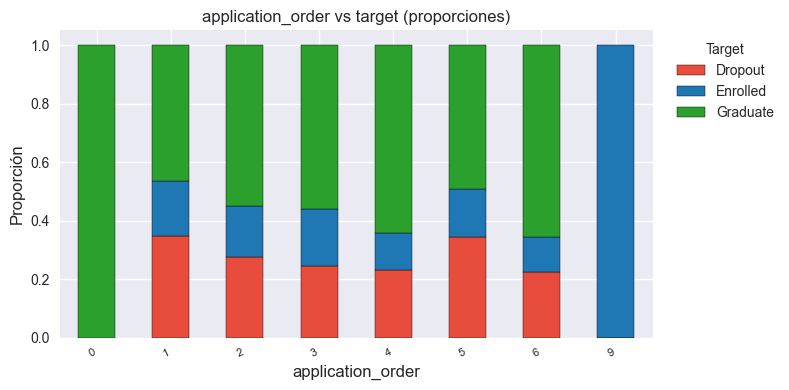

,Descripcion,N,Porcentaje,Dropout_N,Dropout_%,Enrolled_N,Enrolled_%,Graduate_N,Graduate_%
application_order,,,,,,,,,
1,2da opción,3026,0.68,1053,34.80,565,18.67,1408,46.53
2,3ra opción,547,0.12,150,27.42,96,17.55,301,55.03
3,4ta opción,309,0.07,76,24.60,60,19.42,173,55.99
4,5ta opción,249,0.06,58,23.29,31,12.45,160,64.26
5,6ta opción,154,0.03,53,34.42,25,16.23,76,49.35
6,7ma opción,137,0.03,31,22.63,16,11.68,90,65.69
0,1ra opción,1,0.00,0,0.00,0,0.00,1,100.00
9,Última opción,1,0.00,0,0.00,1,100.00,0,0.00


In [13]:
import numpy as np
import os

# Paleta para el target
palette_target = {
    "Dropout": "#E74C3C",   # Rojo
    "Enrolled": "#1F77B4",  # Azul
    "Graduate": "#2CA02C"   # Verde
}



OUTPUT_DIR = "../outputs/figures/EDA/3_categoricas/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def plot_categorico_bivariado(df, column, target="target"):
    ctab = pd.crosstab(df[column], df[target], normalize="index")

    print(f"\n===== {column.upper()} vs TARGET =====")
    
    # Decidir orientación según número de categorías
    if len(ctab) > 8:
        figsize = (10, 6)
        kind = "barh"
    else:
        figsize = (8, 4)
        kind = "bar"

    fig, ax = plt.subplots(figsize=figsize)

    ctab.plot(
        kind=kind,
        stacked=True,
        color=list(palette_target.values()),
        ax=ax,
        edgecolor="black"
    )

    plt.title(f"{column} vs {target} (proporciones)", fontsize=12)

    # Ajustar etiquetas según orientación
    if kind == "bar":
        ax.set_xlabel(column)
        ax.set_ylabel("Proporción")
        plt.xticks(rotation=25, ha="right", fontsize=8)
    else:
        ax.set_xlabel("Proporción")  # En horizontal, X es la proporción
        ax.set_ylabel(column)         # Y es la variable categórica
        plt.yticks(fontsize=8)

    # Leyenda fuera del gráfico
    ax.legend(title="Target", bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.tight_layout()

    filename = f"08_bivariado_{column}.png"
    filepath = os.path.join(OUTPUT_DIR, filename)
    # Guardar imagen
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

    # =================================================================
    # TABLA CON PROPORCIÓN + DISTRIBUCIÓN POR TARGET
    # =================================================================
    
    # Crosstab con conteos
    ct_counts = pd.crosstab(df[column], df['target'])
    
    # Crosstab con porcentajes por fila (cada categoría suma 100%)
    ct_pct = pd.crosstab(df[column], df['target'], normalize='index') * 100

    # Crear tabla resumen
    summary = pd.DataFrame({
        'N': df[column].value_counts(),
        'Porcentaje': df[column].value_counts(normalize=True).round(2),
        'Dropout_N': ct_counts['Dropout'],
        'Dropout_%': ct_pct['Dropout'].round(2),
        'Enrolled_N': ct_counts['Enrolled'],
        'Enrolled_%': ct_pct['Enrolled'].round(2),
        'Graduate_N': ct_counts['Graduate'],
        'Graduate_%': ct_pct['Graduate'].round(2)
    })

    # Agregar descripción
    if column in LABELS:
        summary['Descripcion'] = summary.index.map(LABELS[column])
        # Reordenar columnas para que Descripcion esté primero
        summary = summary[['Descripcion', 'N', 'Porcentaje','Dropout_N','Dropout_%','Enrolled_N','Enrolled_%','Graduate_N','Graduate_%']]
    
    # Ordenar por N descendente
    summary = summary.sort_values('N', ascending=False)
    
    display(summary)

# Ejecutar
for col in VARS_CATEGORICAS_NOMINALES + VARS_CATEGORICAS_ORDINALES:
    plot_categorico_bivariado(df, col)

##### 3.3.1.2 Análisis BIVARIADO - Conclusiones preliminares

1. Variable marital_status. De las 2 categorías más representativas 1 (soltero) desertan un 30% y 2 (casado) un 47%, este último grupo tiene 1.5 veces más riesgo de desertar y las restantes presentan muy pocos casos (menos de 30 registros) para generar variabilidad significativa respecto del target. Dado este escenario, se creará un nueva binaria 
'es_soltero' con valores 1 para solteros y 0 para no solteros.
 
2. Variable application_mode. De las 3 categorías más representativas  1 (1ra fase - contingente general), 17 (2da fase - contingente general) y 39 (Mayor de 23 años) con un 18%, la que presenta mayor % de deserción es 39 (Mayor de 23 años). Dado este escenario, se podrían realizar 2 tareas en etapa de preprocesamiento: 1-.agrupar las categorías por algún concepto y 2-. analizar la creación de una variable que permita la identificación de esta categoría.

3. Variable course. El rango de deserción por programa es muy amplio (15% - 67%), se considera que es una variable altamente predictiva. Nursing (950) presenta la menor tasa de deserción (15.4%) y tiene la mayor número de estudiantes (N=765). Esto sugiere alta motivación y/o mejor soporte en programas de salud. En cambio, los programas técnicos como Informatics Engineering (9119) 54.1% y Equinculture (9130) presentan las mayores tasas de deserción del 54% y 55%. Pre-procesamiento posible encoding. 

4. Variable nacionality. En la nacionalidad 1 (Portugués) desertán el 32.2% (4.314 estudiantes), todas las demás nacionalidades si bien presentan porcentajes de deserción los registros no son suficientes para ser considerados. En consecuencia, no hay diferencia significativa en deserción. Esta variable no se considerará en los modelos. 

5. Variable previous_qualification. Los estudiantes con Educación secundaria desertan en un 29%, con Especialización tecnológica un 32%, con Ed. básica 3er ciclo un 64%. Existe un escenario 
paradógico que los estudiantes con menor grado de estudios (9, 12, 10 y 15) y con estudios de post titulo (2, 3) presentan una tasa de deserción sobre el 50%. Se visualiza posible agrupación 
de categorias por riesgo de deserción, se debe evaluar como quedaría la distribución.

6. Variable fathers_qualification. La categoría 34 (desconocido) presenta la mayor de serción con un 72%, casos en que el estudiantes que no reportan información del padre. Con un padre con 37 (Ed. básica 1er ciclo) y 38 (Ed. básica 2do ciclo) se tienen tasas de deserción del 36% y 24%.  No hay relación lineal clara entre nivel educativo y deserción.

7. Variable mothers_qualification. La categoría 34 (desconocido) presenta la mayor de serción con un 74%, casos en que el estudiantes que no reportan info de la madre. Con un padre con 37 (Ed. básica 1er ciclo) y 38 (Ed. básica 2do ciclo) se tienen tasas de deserción del 38% y 25%.  No hay relación lineal clara entre nivel educativo y deserción 

8. Variable mothers_occupation. Las categorías que presentan mayor deserción son: 99 ("en blanco") 77%, 90 (Otra situación) 73%, 0 (Estudiante) 68%. En este ultimo caso una madre estudiante podría implicar una situación económica inestable. Las demás ocupaciones tienen tasas similares de deserción con un rango entre 27% - 32% no existiendo gran diferencia entre ocupaciones específicas.

9. Variable fathers_occupation. Presenta un comportamiento símil a  la variable mothers_occupation Las categorias que presentan mayor deserción son: 99 ("en blanco") 68%, 90 (Otra situación) 71%, 0 (Estudiante) 64%. En este ultimo caso un padre estudiante podría implicar una situación económica inestable. Las demás ocupaciones tienen tasas similares de deserción con un rango entre 28% - 36% no existiendo gran diferencia entre ocupaciones específicas.

10. Variable application_order. Se detecta patrón especial, dado que el mayor indice de deserción se encuentra en las primeras opciones de postulacion al grado, por ejemplo, estudiantes que eligieron como 2da opción (mayoría) tienen la mayor deserción (34.8%) y estudiantes que eligieron como 7ma opción tienen la menor deserción (22.6%).

#### 3.3.3 Conclusiones análisis variables categóricas ordinales y nominales

1. Algunas variables categóricas son altamente predictivas, especialmente:
- course (variación extrema en deserción 15–67%)
- application_mode (categoría >23 años = muy riesgosa)
- fathers_qualification y mothers_qualification sin información de (≈ 70% deserción)

2. Otras variables presentan bajo valor predictivo o alta concentración en una categoría, será evaluada su exclusión:
- nacionality
- educational_special_needs
- international

3. Muchas variables necesitan agrupación o ingeniería de caracteristicas:
- Agrupación de estudios previos (ej. riesgo_calificacion_previa)
- Agrupación de ocupación (ej. nivel_ocupacion)
- Variable derivada: has_unknown_parent_info 

4. La variable ordinal application_order no presenta un patrón lineal, pero sigue aportando información moderada sobre preferencia del estudiante y riesgo de abandono.

5. Las variables categóricas nominales y la ordinal del dataset aportan información estructural relevante sobre antecedentes académicos, preferencias de postulación y contexto socioeconómico. Varias de ellas, especialmente course, application_mode, y atributos familiares, muestran un papel significativo en la predicción del abandono. Sin embargo, otras variables, debido a su fuerte desbalance o baja sensibilidad al fenómeno de deserción, deben ser excluidas o transformadas. El adecuado tratamiento de estas variables mediante agrupaciones, encoding avanzado y creación de variables derivadas permitirá mejorar sustancialmente el rendimiento de los modelos predictivos.

### 3.4 Distribución de la variable objetivo `Target`
Valores:
- 0 = Dropout
- 1 = Graduate
- 2 = Enrolled

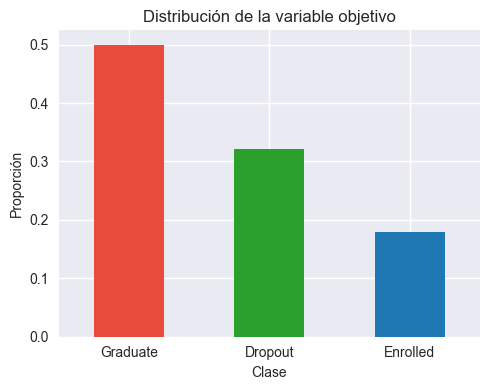

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [14]:
plt.figure(figsize=(5, 4))   # <-- más pequeño
df['target'].value_counts(normalize=True).plot(
    kind='bar',
    #color=['red', 'green', 'blue']
    color=['#E74C3C', '#2ca02c', '#1f77b4']
)


OUTPUT_DIR = "../outputs/figures/EDA/4_target/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# Nombre archivo 
filename = f"09_distribucion_target.png"
filepath = os.path.join(OUTPUT_DIR, filename)

plt.title("Distribución de la variable objetivo", fontsize=12)
plt.xlabel("Clase", fontsize=10)
plt.ylabel("Proporción", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(filepath, dpi=300, bbox_inches='tight')
plt.show()

df['target'].value_counts()

#### Conclusión de Distribución de la variable objetivo `Target`

1. La variable objetivo target presenta tres posibles resultados académicos para cada estudiante: Graduate, Dropout y Enrolled. La distribución observada en el dataset es la siguiente:
- Graduate: 2.209 estudiantes (≈ 50%). Corresponde a estudiantes que lograron titularse (Graduate), representando aproximadamente la mitad del total. 
- Dropout: 1.421 estudiantes (≈ 32%). La tasa de deserción (Dropout) es notablemente alta, alcanzando un 32%, lo que confirma que la deserción es un fenómeno relevante y suficientemente frecuente como para justificar el desarrollo de modelos predictivos e intervenciones institucionales.
- Enrolled: 794 estudiantes (≈ 18%). Corresponde a estudiantes que permanecen activos o no han completado su trayectoria. Aunque este grupo no representa abandono directo, y continua con un grado en proceso.

2. La relación entre clases es aproximadamente 2:1 entre No Dropout (Graduate + Enrolled) y Dropout y es un desbalance moderado.

3. La distribución del target evidencia que la deserción afecta a uno de cada tres estudiantes, lo que convierte a este problema en una prioridad institucional. La distribución es adecuada para el modelado predictivo y proporciona una base sólida para explorar factores asociados al abandono académico mediante el Análisis Exploratorio de Datos y posteriormente los modelos de Machine Learning.
 



## 4. Conclusiones del EDA

- El dataset contiene **4.424 registros y 37 variables**, con buena estructura.
- No se observan valores nulos significativos.
- Existe un **marcado desbalance** en la variable objetivo.
- Las variables numéricas muestran patrones esperables, aunque con algunos valores extremos.
- Se identifican **correlaciones importantes** entre variables de rendimiento.
- Las variables categóricas están codificadas numéricamente; requerirán transformaciones.
- El dataset es apropiado para modelos supervisados, pero se necesitarán:
  - Ingeniería de características
  - Normalización/estandarización
  - Manejo del desbalance (SMOTE o class weights)
  - Selección correcta de la variable objetivo (binaria vs multiclase)

El EDA sienta las bases para avanzar hacia la fase de preprocesamiento y creación de pipelines.
